**Assignment 5: Knowledge & Reasoning (Given: 21 Mar 2023, Due: 9 Apr 2023)**


**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle on the due date. 
* Your code should be well commented and should be compatible with python3.
* For this assignment, you are allowed to import the libraries `pycosat`, `matplotlib`, `random` and `numpy` of python3. No other libraries may be imported.
* To start the jupyter notebook in the lab machine, enter
`source /opt/anaconda3/bin/activate base` (note the space after `source` and before `base`) in the terminal and then type `jupter notebook`
* Again, in the lab machines, if you are getting an error when importing `pycosat` saying that package is not installed, run `!pip3 install pycosat` in a jupyter notebook and install.

# Island of Knights and Knaves

Consider the island of Knights and Knaves where each inhabitant is either a knight or a knave. A knight always tells the truth: if knight states a sentence, then that sentence is true. A knave always lies: if a knave states a sentence, then that sentence is false. Now, given a set of statements mentioned by some inhabitants, the problem is to determine whether each of these inhabitants is a knight or a knave. This problem can be expressed as a Satisfiability problem of a Boolean formula. 

For example, consider the following statements by three people, 

 * A says either "I am a knight" or "I am a knave", but you don't know which.
 * B says "A said I am a knave"
 * B says "C is a knave"
 * C says "A is a knight"

We will now show how to solve this puzzle by expressing facts about the island and the statements made by the inhabitants as propositional statements in CNF (Conjunctive Normal Form) and solve for a satisfying assignment by calling a standard SAT solving algorithm. We will use the `pycosat` which is wrapper for *picosat* SAT solver written in C.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pycosat 

In [3]:
# total number of people
number_of_people = 3



(a) For each person X introduce appropriate variables to capture whether X is a knight or a knave.  Using these variables, introduce appropriate propositional statements that (1) capture that each person is either a knight or a knave, and (2) exactly matches the statements that each of them makes about themselves or others. Write these statements as text (in [markdown](https://www.markdownguide.org/basic-syntax/)) in the cell below.

* *A* says **either "I am a knight" or "I am a knave", but you don't know which**

* *B* says **"A said I am a knave"**

* *B* says **"C is a knave"**


* *C* says **"A is a knight"**


(b) Convert the above expressions to CNF formulas in the format used in `pycosat`.

(c) Invoke the solver in `pycosat` and find who among A, B and C are knights and  knaves. 

(d) Repeat parts (a)-(c) for the following sets of statements. In these statements, there are only two inhabitants of the island.

i. A says "At least one of us is a knave" and B says nothing.

ii. A says "We are the same kind", B says "We are of different kinds"




For all persons, either he has to be a knight or a knave but not both

* (Aknight $\vee$ Aknave) $\wedge$ ($\neg$ Aknight $\vee$ $\neg$ Aknave)
* (Bknight $\vee$ Bknave) $\wedge$ ($\neg$ Bknight $\vee$ $\neg$ Bknave)
* (Cknight $\vee$ Cknave) $\wedge$ ($\neg$ Cknight $\vee$ $\neg$ Cknave)

In [4]:
# introducing variable for the following
a_knight = 1
a_knave = 2

b_knight = 3
b_knave = 4

c_knight = 5
c_knave = 6



# dictionary for truth values
truth_values = {
  'a_knight': False,
  'a_knave': False,
  'b_knight': False,
  'b_knave': False, 
  'c_knight': False,
  'c_knave': False
}
# dictionary for variables
variable_dictionary = {
  1: 'a_knight',
  2:'a_knave',
  3: 'b_knight',
  4: 'b_knave',
  5: 'c_knight',
  6: 'c_knave'
}


cnf1 = [[a_knight, a_knave], [-a_knight,-a_knave]]
# A should be either knight or knave but exactly one of these

# similarly for B and C
cnf2 = [[b_knight, b_knave],[-b_knight, -b_knave]]
cnf3 = [[c_knight, c_knave], [-c_knight, -c_knave]]

clause_1 = [a_knight]
clause_2 = [b_knight]
clause_3 = [c_knight]





## The first set of statements are the following

* *A* says **"Either I am a knight or a knave"**

* *B* says **"A said I am a knave"**

Here I refers to B

* *B* says **"C is a knave"**


* *C* says **"A is a knight"**


In [5]:
# introducing variable for the following
a_knight = 1
a_knave = 2

b_knight = 3
b_knave = 4

c_knight = 5
c_knave = 6




truth_values = {
  'a_knight': False,
  'a_knave': False,
  'b_knight': False,
  'b_knave': False, 
  'c_knight': False,
  'c_knave': False
}
variable_dictionary = {
  1: 'a_knight',
  2:'a_knave',
  3: 'b_knight',
  4: 'b_knave',
  5: 'c_knight',
  6: 'c_knave'
}


cnf1 = [[a_knight, a_knave], [-a_knight,-a_knave]]
# A should be either knight or knave but exactly one of these

# similarly for B and C
cnf2 = [[b_knight, b_knave],[-b_knight, -b_knave]]
cnf3 = [[c_knight, c_knave], [-c_knight, -c_knave]]

# clause_1 = [a_knight]
# clause_2 = [b_knight]
# clause_3 = [c_knight]





* Cknight $\implies$ Aknight

$\neg$ Cknight $\vee$ Aknight

* Cknave $\implies$ $\neg$ Aknight

$\neg$ Cknave $\vee$ $\neg$ Aknight

In [6]:

# if C is a knight, then what he said is True
# we get a clause

clause_1 = [-c_knight, a_knight]

# if C is a knave, then what he said is False
# we get a clause
clause_2 = [-c_knave, -a_knight]





* Bknight $\implies$ Cknave

$\neg$ Bknight $\vee$ Cknave

* Bknave $\implies$ $\neg$ Cknave

$\neg$ Bknave $\vee$ $\neg$ Cknave

* Bknight $\implies$ ((Aknight $\implies$ Bknave) $\vee$ (Aknave $\implies$ $\neg$ Bknave))

$\neg$ Bknight $\vee$ $\neg$ Aknight $\vee$ Bknave $\vee$ $\neg$ Aknave $\vee$ $\neg$ Bknave


In [7]:
# B says "C is a knave"
# if B is knight, then what he said is True
clause_3 = [-b_knight, c_knave]



# if B is knave, then what he said is False
clause_4  = [-b_knave, -c_knave]

# if B is knight, then what he said is True
# ie A said I am a knave
# I refers to B
# we get a clause
clause_9 = [
  -b_knight, -a_knight, b_knave, -a_knave, -b_knave
]

# if B is knave, then what he said is False
# Which means A did not say anything about B
# which is same as Bknave implies empty sentence

# cnf6 = [
#   [-b_knave, -b_knight]
# ]




* Aknight $\implies$ (Aknight $\vee$ Aknave)

$\neg$ Aknight $\vee$ $\neg$ Aknight $\vee$ Aknave 

* Aknave $\implies$ $\neg$ (Aknight $\vee$ Aknave)

($\neg$ Aknave $\vee$ $\neg$ Aknight) $\wedge$ ($\neg$ Aknave $\vee$ $\neg$ Aknave)

In [8]:
# A says "either I am a knight or I am knave"

# if A is a knight, then what he said is true
# we get a clause

clause_6 = [-a_knight, a_knight, a_knave]

# if A is a knave, then what he said is false

# we get a cnf

cnf5 = [
  [-a_knave, -a_knight],
  [-a_knave, -a_knave]
]







In [9]:
cnf = [*cnf1, clause_6, *cnf5, *cnf2, clause_3, clause_4, clause_9, *cnf3, clause_1, clause_2 ]
for solution in pycosat.itersolve(cnf):
  print(solution)

solution = pycosat.solve(cnf)
# print(solution)


if solution!='UNSAT':
  # * list name means we are unpacking the list

  print()
  print()
  print('The truth values are')
  for variable in solution:
    person = variable_dictionary[abs(variable)]
    if variable == abs(variable):
      truth_values[person] = True
    else:
      truth_values[person] = False


  for key, value in truth_values.items():
    print(key, value)

  print()
  print()
  print()


  for key, value in truth_values.items():
    if (value):
      print(f'{key[0].upper()} is a {key[2:].capitalize()}')

else:
  print('The given CNF is unsatisfiable')


[1, -2, -3, 4, 5, -6]


The truth values are
a_knight True
a_knave False
b_knight False
b_knave True
c_knight True
c_knave False



A is a Knight
B is a Knave
C is a Knight


### The next set of statements are

* *A* says **"Atleast one of us is a knave"**

* *B* says **nothing**




In [10]:

truth_values = {
  'a_knight': False,
  'a_knave': False,
  'b_knight': False,
  'b_knave': False, 
  # 'c_knight': False,
  # 'c_knave': False
}
variable_dictionary = {
  1: 'a_knight',
  2:'a_knave',
  3: 'b_knight',
  4: 'b_knave',
  # 5: 'c_knight',
  # 6: 'c_knave'
}


In [11]:

cnf1 = [[a_knight, a_knave], [-a_knight,-a_knave]]
# A should be either knight or knave but exactly one of these

# similarly for B and C
cnf2 = [[b_knight, b_knave],[-b_knight, -b_knave]]
# cnf3 = [[c_knight, c_knave], [-c_knight, -c_knave]]

* Aknight $\implies$ (Aknave $\vee$ Bknave)

$\neg$ Aknight $\vee$ Aknave $\vee$ Bknave

* AKnave $\implies$ $\neg$ (Aknave $\vee$ Bknave)

($\neg$ AKnave $\vee$ $\neg$ Aknave) $\wedge$ ($\neg$ AKnave $\vee$ $\neg$ Bknave)

In [12]:
# clause_1 = [
#   a_knave,b_knave
# ]
# the above represents atleast one of us is a knave
# if A is a Knight, then what he said is true
# converting that to cnf we get a clause
clause_4 = [-a_knight, a_knave, b_knave]

# if A is a knave, then what he said is False
# we get a cnf
cnf3 = [[-a_knave, -a_knave], [-a_knave, -b_knave]]


In [13]:
cnf = [*cnf1,*cnf2,*cnf3, clause_4]
for solution in pycosat.itersolve(cnf):
  print(solution)

solution = pycosat.solve(cnf)

# * list name means we are unpacking the list

print()
print()
print('The truth values are')
for variable in solution:
  person = variable_dictionary[abs(variable)]
  if variable == abs(variable):
    truth_values[person] = True
  else:
    truth_values[person] = False


for key, value in truth_values.items():
  print(key, value)

print()
print()
print()


for key, value in truth_values.items():
  if (value):
    print(f'{key[0].upper()} is a {key[2:].capitalize()}')




[1, -2, -3, 4]


The truth values are
a_knight True
a_knave False
b_knight False
b_knave True



A is a Knight
B is a Knave


### The next set of statements are

* *A* says **"We are the same kind"**

* *B* says **"We are of different kinds"**




In [14]:
truth_values = {
  'a_knight': False,
  'a_knave': False,
  'b_knight': False,
  'b_knave': False, 
  # 'c_knight': False,
  # 'c_knave': False
}
variable_dictionary = {
  1: 'a_knight',
  2:'a_knave',
  3: 'b_knight',
  4: 'b_knave',
  # 5: 'c_knight',
  # 6: 'c_knave'
}


In [15]:

cnf1 = [[a_knight, a_knave], [-a_knight,-a_knave]]
# A should be either knight or knave but exactly one of these

# similarly for B and C
cnf2 = [[b_knight, b_knave],[-b_knight, -b_knave]]
# cnf3 = [[c_knight, c_knave], [-c_knight, -c_knave]]

* AKnight $\implies$ ((Aknight $\wedge$ Bknight) $\vee$ (Aknave $\wedge$ Bknave))

($\neg$ Aknight $\vee$ Aknight $\vee$ Aknave) $\wedge$
($\neg$ Aknight $\vee$ Bknight $\vee$ Aknave) $\wedge$
($\neg$ Aknight $\vee$ Aknight $\vee$ Bknave) $\wedge$
($\neg$ Aknight $\vee$ Bknight $\vee$ Bknave)


* Aknave $\implies$ $\neg$ ((Aknight $\wedge$ Bknight) $\vee$ (Aknave $\wedge$ Bknave))

($\neg$ Aknave $\vee$ $\neg$ Aknave $\vee$ $\neg$ Bknave) $\wedge$ ($\neg$ Aknave $\vee$ Bknave)



In [16]:
# if A is a knight, then what he said is True
# we get the cnf
cnf3 = [
  [-a_knight,a_knight,a_knave],
  [-a_knight,b_knight, a_knave],
  [-a_knight,a_knight, b_knave],
  [-a_knight,b_knight, b_knave]
]

# if A is a knave, then what he said is false
# we get the cnf
cnf4 = [
  [-a_knave, -a_knave, -b_knave],
  [-a_knave, -b_knave]
]





* Bknight $\implies$ ((Aknight $\wedge$ Bknave) $\vee$ (Aknave $\wedge$ Bknight)) 

($\neg$ Bknight $\vee$ Aknight $\vee$ Aknave) $\wedge$
($\neg$ Bknight $\vee$ Bknave $\vee$ Aknave) $\wedge$
($\neg$ Bknight $\vee$ Aknight $\vee$ Bknight) $\wedge$
($\neg$ Bknight $\vee$ Bknave $\vee$ Bknight) 

* Bknave $\implies$ $\neg$ ((Aknight $\wedge$ Bknave) $\vee$ (Aknave $\wedge$ Bknight))

($\neg$ Bknave $\vee$ $\neg$ Aknight $\vee$ $\neg$ Bknave) $\wedge$
($\neg$ Bknave $\vee$ $\neg$ Aknave $\vee$ $\neg$ Bknight)


In [17]:
# if B is a knight, then what he said is True
# we get the cnf

cnf5 = [
  [-b_knight, a_knight, a_knave],
  [-b_knight, b_knave, a_knave],
  [-b_knight, a_knight, b_knight],
  [-b_knight, b_knave, b_knight]
]

# if B is knave, then what he said is False
# we get the cnf
cnf6 = [
  [-b_knave, -a_knight, -b_knave],
  [-b_knave,-a_knave, -b_knight]
]





In [18]:
cnf = [*cnf1,*cnf2,*cnf3, *cnf4, *cnf5, *cnf6]
for solution in pycosat.itersolve(cnf):
  print(solution)

solution = pycosat.solve(cnf)

# * list name means we are unpacking the list

print()
print()
print('The truth values are')
for variable in solution:
  person = variable_dictionary[abs(variable)]
  if variable == abs(variable):
    truth_values[person] = True
  else:
    truth_values[person] = False


for key, value in truth_values.items():
  print(key, value)

print()
print()
print()


for key, value in truth_values.items():
  if (value):
    print(f'{key[0].upper()} is a {key[2:].capitalize()}')




[-1, 2, 3, -4]


The truth values are
a_knight False
a_knave True
b_knight True
b_knave False



A is a Knave
B is a Knight


# Binary Town 


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
# import pycosat 


class Kid:
  def __init__(self, i: int, height: float, weight: float = 0) -> None:
    self.kid_name = i
    self.kid_height = height
    self.kid_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


class Adult:
  def __init__(self,i: int, height: int, weight: float = 0) -> None:
    self.adult_name = i
    self.adult_height = height
    self.adult_weight = weight
  def __lt__(self, other):
    return True
  def __gt__(self, other):
    return True


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

In [20]:


height_list_in_town = [4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8]
numHeights = len(height_list_in_town)
p_ht_given_kid = [0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]
p_ht_given_adult = [0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, 0.18, 0.18, 0.18]



In [21]:

p_height_given_kid_dictionary = dict()
for i in range(numHeights):
  # we can access the probability of height x, given kid
  p_height_given_kid_dictionary[height_list_in_town[i]] = p_ht_given_kid[i]

p_height_given_adult_dictionary = dict()
for i in range(numHeights):
  # we can access the probability of height x, given adult
  p_height_given_adult_dictionary[height_list_in_town[i]] = p_ht_given_adult[i]


# pKid is given to be 0.4
pKid = 0.4


(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

In [22]:


def simulate_people(n: int, height_list_in_town: list, p_ht_given_kid: list, p_ht_given_adult: int, pKid: float ):
  # returns kid list and adult list

  kid_list  = []
  adult_list = []
  people_name_height = []
  # list containing tuple of name and height
  for i in range(n):
    kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    # print(kid_or_adult)
    if kid_or_adult == 'kid':
      height_of_kid = rnd.choices(height_list_in_town, weights=p_ht_given_kid,k=1)[0]
      kid_list.append(Kid(i, height_of_kid))
      people_name_height.append((i,height_of_kid))
    else:
      height_of_adult = rnd.choices(height_list_in_town, weights=p_ht_given_adult,k=1)[0]
      adult_list.append(Adult(i, height_of_adult))
      people_name_height.append((i,height_of_adult))
  return kid_list, adult_list, people_name_height

# kid_objects, adult_objects = simulate_people(10000, height_list_in_town, p_ht_given_kid, p_ht_given_adult)
# the above is simulated for 10000 people

In [23]:

total_population = 1000

kid_objects, adult_objects, people_name_height_list = simulate_people(total_population, height_list_in_town, p_ht_given_kid, p_ht_given_adult,pKid)



In [24]:
# dictionary which represents who is kid and who is adult
people_type = dict()
for i in range(total_population):
  people_type[i] = ''
for kid in kid_objects:
  kid: Kid
  people_type[kid.kid_name] = 'kid'
for adult in adult_objects:
  adult: Adult
  people_type[adult.adult_name] = 'adult'


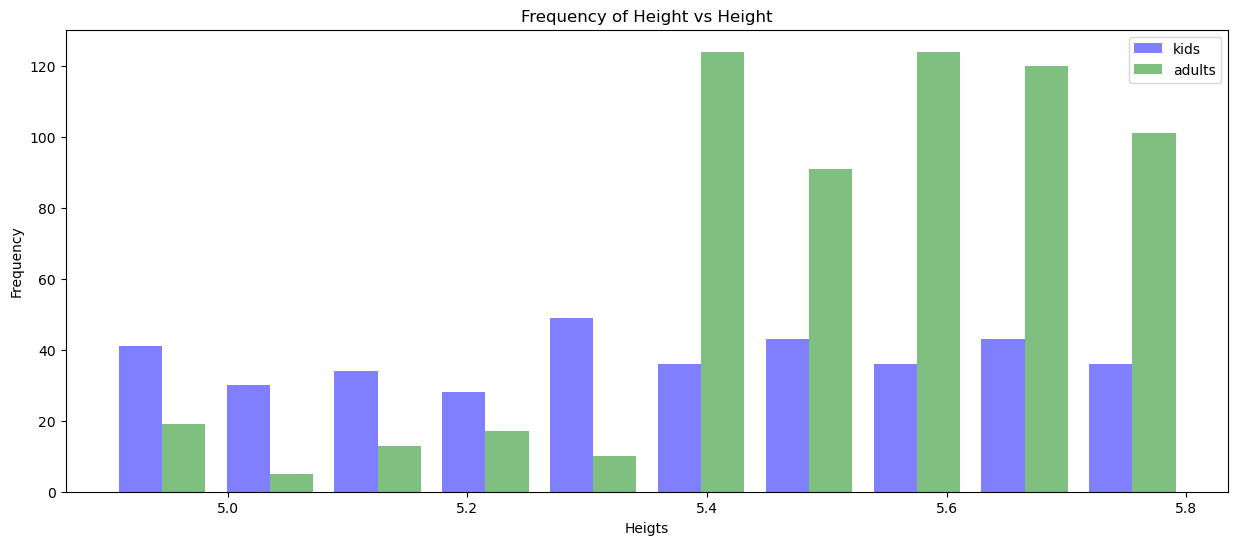

In [25]:

# 2a

kid_heights = [isinstance(kid,Kid) and kid.kid_height for kid in kid_objects]
adult_heights = [isinstance(adult, Adult) and adult.adult_height for adult in adult_objects]
plt.figure(figsize=(15,6))

# plt.hist(
#   kid_heights,
#   # bins=10,
#   label='kids',
#   alpha = 0.5,
#   # color='b'
# )
# plt.hist(
#   adult_heights,
#   # bins=10,
#   label='adults',
#   alpha = 0.5,
#   # color='g'
# )

plt.hist(
  [kid_heights, adult_heights],
  label=['kids','adults'],
  alpha=0.5,
  color=['blue','green']
)

plt.legend(loc='upper right')
plt.xlabel('Heigts')
plt.ylabel('Frequency')
plt.title('Frequency of Height vs Height')
plt.show()


In [26]:

height_sample = (kid_heights.copy()).extend(adult_heights.copy())
# sample of all heights


(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [27]:

# 2b
class Agent:
  def __init__(self, height_list_in_town: list, p_height_given_kid_dictionary: dict, p_height_given_adult_dictionary:dict, population: int ) -> None:
    self.possible_heights = height_list_in_town.copy()
    self.pHt_kid_dictionary = p_height_given_kid_dictionary.copy()
    self.pHt_adult_dictionary = p_height_given_adult_dictionary.copy()
    self.population_in_town = population

  def apply_bayes(self, sample: list, pKid: float, heights_in_town: list, pHtKid: list, pHtAdult: list):
    p_ht_kid_dictionary = dict()
    p_ht_adult_dictionary = dict()

    # sample is a list containing tuples as element
    # each tuple is of the form (person_name, height)
    for i in range(len(heights_in_town)):
      p_ht_kid_dictionary[heights_in_town[i]] = pHtKid[i]
      p_ht_adult_dictionary[heights_in_town[i]] = pHtAdult[i]
    

    
    # given a height we want to calculate the probability of whether the person is a kid 
    p_kid_height = dict()
    # the above dictionary stores the height X as 'key' and the probability whether the person is kid as 'value'
    p_adult_height = dict()
    for height in heights_in_town:
      z = p_ht_kid_dictionary[height] * pKid
      y = p_ht_adult_dictionary[height] * (1-pKid)
      prob_kid_height = z/(z+y)
      # print(z/(z+y))
      p_kid_height[height] = prob_kid_height
      p_adult_height[height]  = 1 - prob_kid_height
    


    predictions = dict()
    for i in range(self.population_in_town):
      predictions[i] = ''
    # for sample_element in sample:
    #   # sample element is a tuple of the form (name, height)
    #   name, height_given = sample_element

      name, height_given = sample[i]

      # print(name)
      # print([p_kid_height[height_given], p_adult_height[height_given]])
      # if kid, will give true
      prediction_kid_adult = rnd.choices(
        [True,False],
        weights=[p_kid_height[height_given], p_adult_height[height_given]],
        k=1
      )[0]
      # print(prediction_kid_adult)
      # print(name, height_given)

      # now we will store the prediction
      predictions[i] = 'kid' if prediction_kid_adult else 'adult'
    
    # now we will return this predictions dictionary
    return predictions
    
  def apply_bayes_real(self, sample_list: list, function_h_k, function_h_a,  pKid: float,):
    # predictions is a dictionary which stores the prediction of each person in town
    # whether he is a kid or an adult

    # function_h_k and  function_h_a are functions 
    # function_h_a: function
    # function_h_k: function
    predictions = dict()
    for i in range(len(sample_list)):
      sample = sample_list[i]
      name, height = sample
      z = function_h_k(height)*pKid
      y = function_h_a(height)*(1-pKid)
      if not z and not y:
        print(function_h_k(height), function_h_a(height))
        print(function_h_k(5.15), function_h_a(5.35))
      P_kid_height = z/(z+y)
      prediction_kid_adult = rnd.choices(
        [True,False],
        weights=[P_kid_height, 1-P_kid_height],
        k=1
      )[0]
      predictions[name] = 'kid' if prediction_kid_adult else 'adult'


    return predictions

In [28]:

agent = Agent(height_list_in_town,p_height_given_kid_dictionary,p_height_given_adult_dictionary, total_population )
prediction_dictionary = agent.apply_bayes(people_name_height_list, pKid, height_list_in_town, p_ht_given_kid,p_ht_given_adult)


In [29]:

# actual information is stored in the dictionary named 'people_type'
correct_prediction = 0
total_count = total_population


for i in range(total_population):
  if prediction_dictionary[i] == people_type[i]:
    correct_prediction += 1


print(f'the number of correct predictions is {correct_prediction}')
print(f'The accuracy of the agent is {correct_prediction/total_count}')




the number of correct predictions is 633
The accuracy of the agent is 0.633


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

In [30]:
def random01():
  return rnd.random()

The cumulative distribution function of $f_{h|k}(x)$ ie 

$F_{h|k}(x)$ is shown below

$F_{h|k}(x) =
\begin{cases}
  0 & \text{if } x \leq 4.5 \\
  x-4.5 & \text{if } 4.5 \lt x \leq 5 \\
  2x-9.5 & \text{if } 5 \lt x \leq 5.25 \\
  1 & \text{otherwise}
\end{cases}$

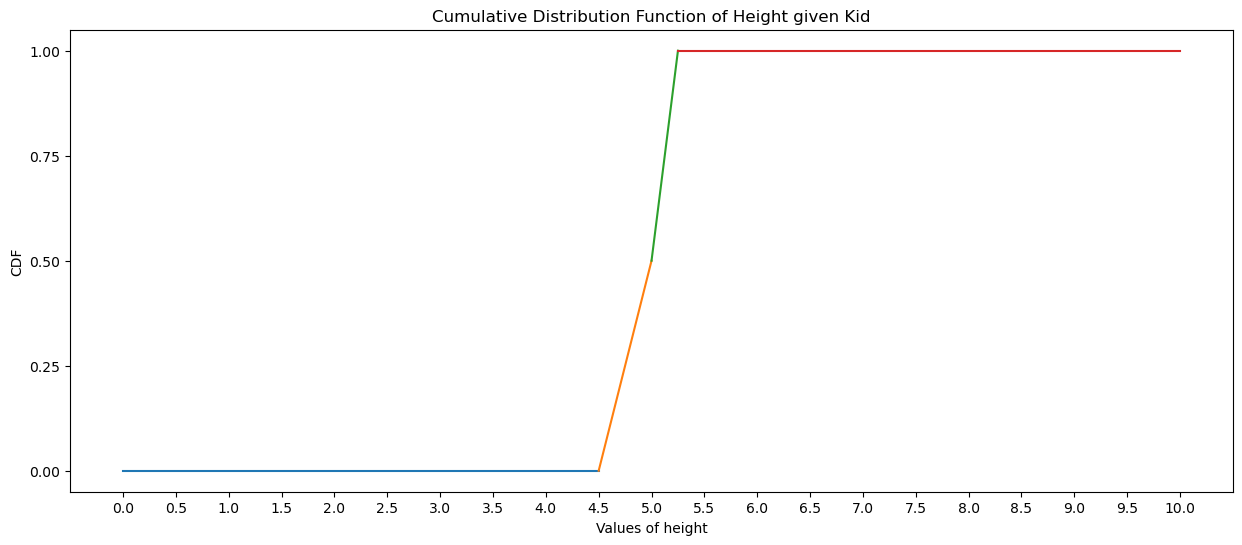

In [31]:
plt.figure(figsize=(15,6))
plt.plot(np.array([0,4.5]),np.array([0,0]))
plt.plot(np.array([4.5,5]),np.array([0,0.5]))
plt.plot(np.array([5,5.25]),np.array([0.5,1]))
plt.plot(np.array([5.25,10]),np.array([1,1]))
plt.xticks(np.arange(0,10.5,0.5))
plt.yticks(np.arange(0,1.25,0.25))
plt.xlabel('Values of height')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Height given Kid')
plt.show()

The cumulative distribution function of $f_{h|a}(x)$ ie 

$F_{h|a}(x)$ is shown below

$F_{h|a}(x) =
\begin{cases}
  0 & \text{if } x \leq 5 \\
  2x-10 & \text{if } 5 \lt x \leq 5.25 \\
  x-4.75 & \text{if } 5.25 \lt x \leq 5.75 \\
  1 & \text{otherwise}
\end{cases}$

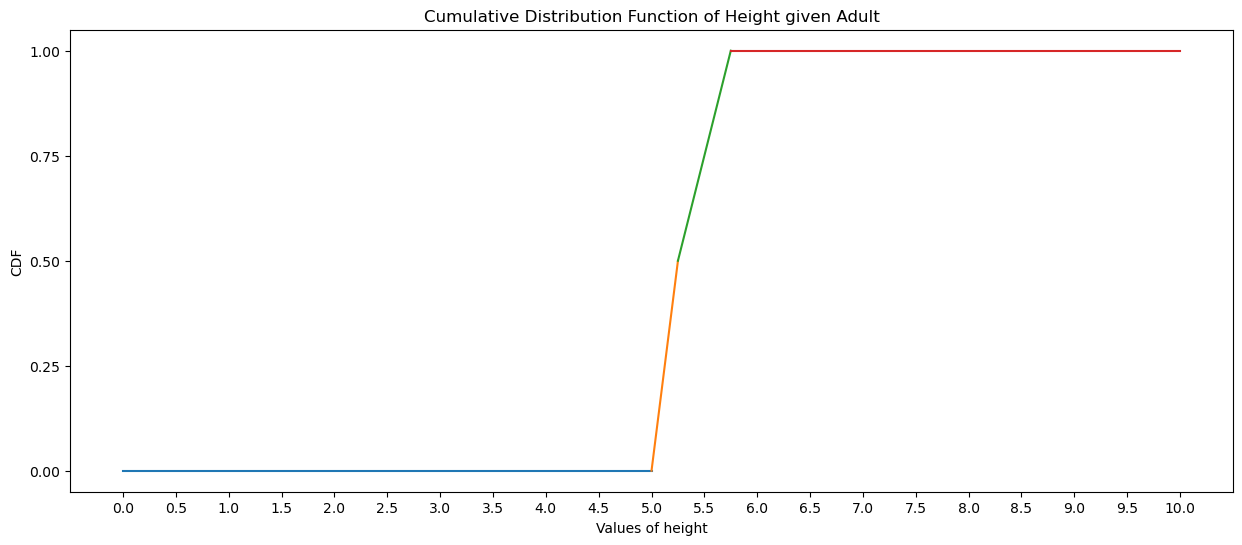

In [32]:
plt.figure(figsize=(15,6))
plt.plot(np.array([0,5]),np.array([0,0]))
plt.plot(np.array([5,5.25]),np.array([0,0.5]))
plt.plot(np.array([5.25,5.75]),np.array([0.5,1]))
plt.plot(np.array([5.75,10]),np.array([1,1]))
plt.xticks(np.arange(0,10.5,0.5))
plt.yticks(np.arange(0,1.25,0.25))
plt.xlabel('Values of height')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Height given Adult')

plt.show()

In [33]:
# def simulate_people_real(n: int,pKid: float ):
#   # returns kid list and adult list

#   kid_list = []
#   adult_list = []
#   people_name_height = []
#   # list containing tuple of name and height
#   for i in range(n):
#     kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
#     # print(kid_or_adult)
#     random_number = random01()
#     if kid_or_adult == 'kid':
#       # we draw a line parallel to x-axis at y=random_number
#       # we check where it intersects and the x-coordinate will be its height
#       if 0 <= random_number <=0.5:
#         height_of_kid = random_number + 4.5
#         kid_list.append(Kid(i,height_of_kid))
#         people_name_height.append((i,height_of_kid))
#       else:
#         height_of_adult = (random_number+9.5)/2
#         adult_list.append(Adult(i, height_of_adult))
#         people_name_height.append((i,height_of_adult))

#     else:
#       if 0 <= random_number <=0.5:
#         height_of_kid = (random_number + 10)/2
#         kid_list.append(Kid(i,height_of_kid))
#         people_name_height.append((i,height_of_kid))
#       else:
#         height_of_adult = (random_number+4.75)
#         adult_list.append(Adult(i, height_of_adult))
#         people_name_height.append((i,height_of_adult))
#   return kid_list, adult_list, people_name_height


In [34]:
def simulate_people_real(n: int,pKid: float ):
  # returns kid list and adult list

  kid_list = []
  adult_list = []
  people_name_height = []
  # list containing tuple of name and height
  for i in range(n):
    kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    # print(kid_or_adult)
    random_number = random01()
    if kid_or_adult == 'kid':
      # we draw a line parallel to x-axis at y=random_number
      # we check where it intersects and the x-coordinate will be its height

      x = np.random.uniform(4.5,5)
      y = np.random.uniform(5,5.25)

      

      # if 0 <= random_number <=0.5:
      #   height_of_kid = random_number + 4.5
      #   kid_list.append(Kid(i,height_of_kid))
      #   people_name_height.append((i,height_of_kid))
      # else:
      #   height_of_kid = (random_number+9.5)/2
      #   kid_list.append(Kid(i, height_of_kid))
      #   people_name_height.append((i,height_of_kid))
      height_of_kid = rnd.choices([x,y], weights=[0.5,0.5],k=1)[0]
      kid_list.append(Kid(i, height_of_kid))
      people_name_height.append((i,height_of_kid))

    else:

      x = np.random.uniform(5,5.25)
      y = np.random.uniform(5.25,5.75)

      # if 0 <= random_number <=0.5:
      #   height_of_adult = (random_number + 10)/2
      #   adult_list.append(Adult(i,height_of_adult))
      #   people_name_height.append((i,height_of_adult))
      # else:
      #   height_of_adult = (random_number+4.75)
      #   adult_list.append(Adult(i, height_of_adult))
      #   people_name_height.append((i,height_of_adult))
      height_of_adult = rnd.choices([x,y], weights=[0.5,0.5],k=1)[0]
      adult_list.append(Adult(i, height_of_adult))
      people_name_height.append((i,height_of_adult))
  return kid_list, adult_list, people_name_height


In [35]:

total_population = 1000

kid_objects_real, adult_objects_real, people_name_height_list_real = simulate_people_real(total_population, pKid=0.4)


In [36]:
# for kid in kid_objects_real:
#   print(kid.kid_height, kid.kid_name)

In [37]:
# dictionary which represents who is kid and who is adult
people_type_real = dict()
for i in range(total_population):
  people_type_real[i] = ''
for kid in kid_objects_real:
  kid: Kid
  people_type_real[kid.kid_name] = 'kid'
for adult in adult_objects_real:
  adult: Adult
  people_type_real[adult.adult_name] = 'adult'


In [38]:
# for key, value in people_type_real.items():
#   print(key, value)

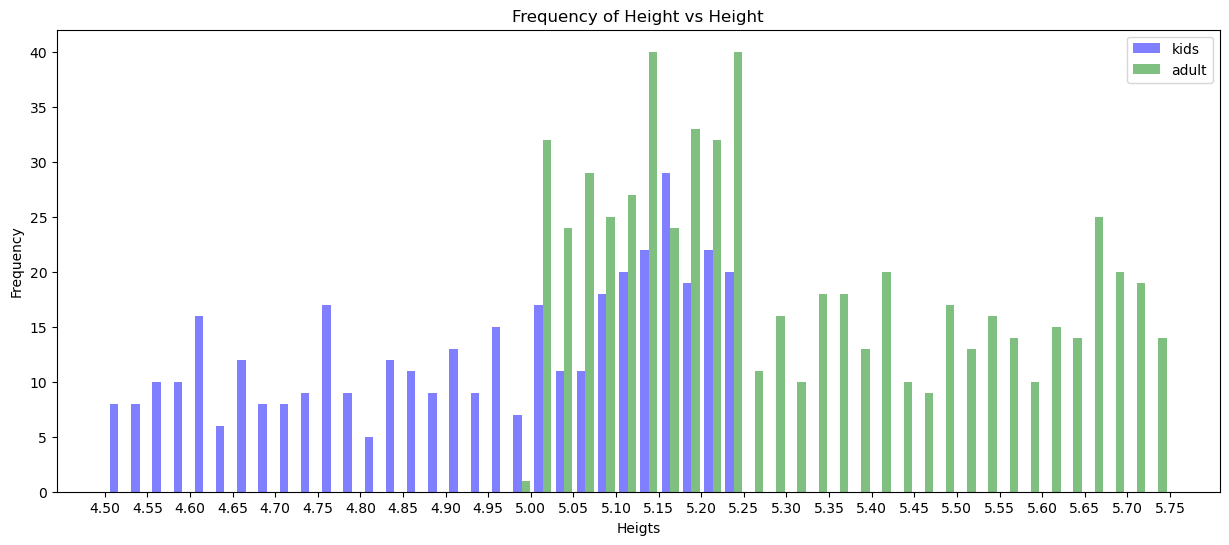

In [39]:

kid_heights = [isinstance(kid,Kid) and kid.kid_height for kid in kid_objects_real]
adult_heights = [isinstance(adult, Adult) and adult.adult_height for adult in adult_objects_real]


plt.figure(figsize=(15,6))
# plt.hist(
#   kid_heights,
#   bins=100,
#   label='kids',
#   alpha = 0.5,
#   # color='b'
# )
# plt.hist(
#   adult_heights,
#   bins=100,
#   label='adults',
#   alpha = 0.5,
#   # color='g'
# )

plt.hist(
  [kid_heights, adult_heights],
  label=['kids','adult'],
  alpha = 0.5,
  color=['blue','green'],
  bins=50
)

plt.xticks(np.arange(4.5,5.80,0.05))
plt.legend(loc='upper right')
plt.xlabel('Heigts')
plt.ylabel('Frequency')
plt.title('Frequency of Height vs Height')
plt.show()

In [40]:
def f_h_k(x: float):
  if 4.5<=x<=5:
    return 1
  elif 5<=x<=5.25:
    return 2
  else:
    return 0

In [41]:
def f_h_a(x: float):
  if 5<=x<=5.25:
    return 2
  elif 5.25<=x<=5.75:
    return 1
  else:
    return 0

In [42]:
# for z in people_name_height_list_real:
#   a = f_h_k(z[1])
#   b = f_h_a(z[1])
#   if (a,b)==(0,0):
#     print(a,b) 

In [43]:
# print(f_h_a(5.35))

In [44]:
agent_prediction_dictionary_real_heights = agent.apply_bayes_real(people_name_height_list_real,function_h_k=f_h_k,function_h_a=f_h_a, pKid=0.4)

In [45]:
correct_prediction_real_heights = 0

for name in agent_prediction_dictionary_real_heights.keys():
  if agent_prediction_dictionary_real_heights[name] == people_type_real[name]:
    correct_prediction_real_heights+=1


print(f'Agent\'s accuracy is {correct_prediction_real_heights/total_population}')



Agent's accuracy is 0.772


(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





In [46]:
# 2d


# 11
mu_height_given_kid = 2.5
sd_height_given_kid = 1
var_height_given_kid = sd_height_given_kid**2

height_given_kid_mu_sd_tuple = (mu_height_given_kid,sd_height_given_kid)

# 21
mu_height_given_adult = 5
sd_height_given_adult = 1
var_height_given_adult = sd_height_given_adult**2
height_given_adult_mu_sd_tuple = (mu_height_given_adult,sd_height_given_adult)

# 12
mu_weight_given_kid = 20
sd_weight_given_kid = 10
var_weight_given_kid = sd_weight_given_kid**2
weight_given_kid_mu_sd_tuple = (mu_weight_given_kid,sd_weight_given_kid)

# 22
mu_weight_given_adult = 40
sd_weight_given_adult = 10
var_weight_given_adult = sd_weight_given_adult**2
weight_given_adult_mu_sd_tuple = (mu_weight_given_adult,sd_weight_given_adult)

In [47]:
pKid = 0.4

In [48]:
def gaussian(mean:float , sd: float):
  return np.random.normal(loc=mean, scale=sd)

In [49]:
gaussian(5,10)

-7.770567047617593

In [50]:
def simulate_people_gaussian(
    n: int, 
    height_given_kid_mu_sd_tuple: tuple,
    height_given_adult_mu_sd_tuple: tuple,
    weight_given_kid_mu_sd_tuple: tuple,
    weight_given_adult_mu_sd_tuple: tuple,
    pKid: float
  ):
  # 11
  mu_height_given_kid = height_given_kid_mu_sd_tuple[0]
  sd_height_given_kid = height_given_kid_mu_sd_tuple[1]
  # var_height_given_kid = sd_height_given_kid**2


  # 21
  mu_height_given_adult = height_given_adult_mu_sd_tuple[0]
  sd_height_given_adult = height_given_adult_mu_sd_tuple[1]
  # var_height_given_adult = sd_height_given_adult**2

  # 12
  mu_weight_given_kid = weight_given_kid_mu_sd_tuple[0]
  sd_weight_given_kid = weight_given_kid_mu_sd_tuple[1]
  # var_weight_given_kid = sd_weight_given_kid**2

  # 22
  mu_weight_given_adult = weight_given_adult_mu_sd_tuple[0]
  sd_weight_given_adult = weight_given_adult_mu_sd_tuple[1]
  # var_weight_given_adult = sd_weight_given_adult**2
  # returns kid list and adult list

  kid_list = []
  adult_list = []
  people_name_height_weight = []
  # tuple containing (name, height, weight)
  for i in range(n):
    kid_or_adult = rnd.choices(['kid','adult'], weights=[pKid,1-pKid], k=1)[0]
    if kid_or_adult == 'kid':
      height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      while height_kid_positive < 0:
        height_kid_positive = gaussian(mu_height_given_kid,sd_height_given_kid)
      weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)
      while weight_kid_positive < 0:
        weight_kid_positive = gaussian(mu_weight_given_kid,sd_weight_given_kid)

      kid_list.append(Kid(i,height_kid_positive, weight_kid_positive))
      people_name_height_weight.append(
        (i,height_kid_positive,weight_kid_positive)
      )
    else:
      height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      while height_adult_positive < 0:
        height_adult_positive = gaussian(mu_height_given_adult,sd_height_given_adult)
      weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)
      while weight_adult_positive < 0:
        weight_adult_positive = gaussian(mu_weight_given_adult,sd_weight_given_adult)

      adult_list.append(Adult(i,height_adult_positive, weight_adult_positive))
      people_name_height_weight.append(
        (i,height_adult_positive,weight_adult_positive)
      )
    
  return kid_list, adult_list, people_name_height_weight



In [51]:
kid_objects_gaussian, adult_objects_gaussian, people_in_town_gaussian = simulate_people_gaussian(
  total_population,
  height_given_kid_mu_sd_tuple,
  height_given_adult_mu_sd_tuple ,
  weight_given_kid_mu_sd_tuple ,
  weight_given_adult_mu_sd_tuple,
  pKid=0.4
)


In [52]:
heights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_height for kid in kid_objects_gaussian
]
weights_of_kid_gaussian = [
  isinstance(kid, Kid) and kid.kid_weight for kid in kid_objects_gaussian
]
heights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_height for adult in adult_objects_gaussian
]
weights_of_adult_gaussian = [
  isinstance(adult, Adult) and adult.adult_weight for adult in adult_objects_gaussian
]



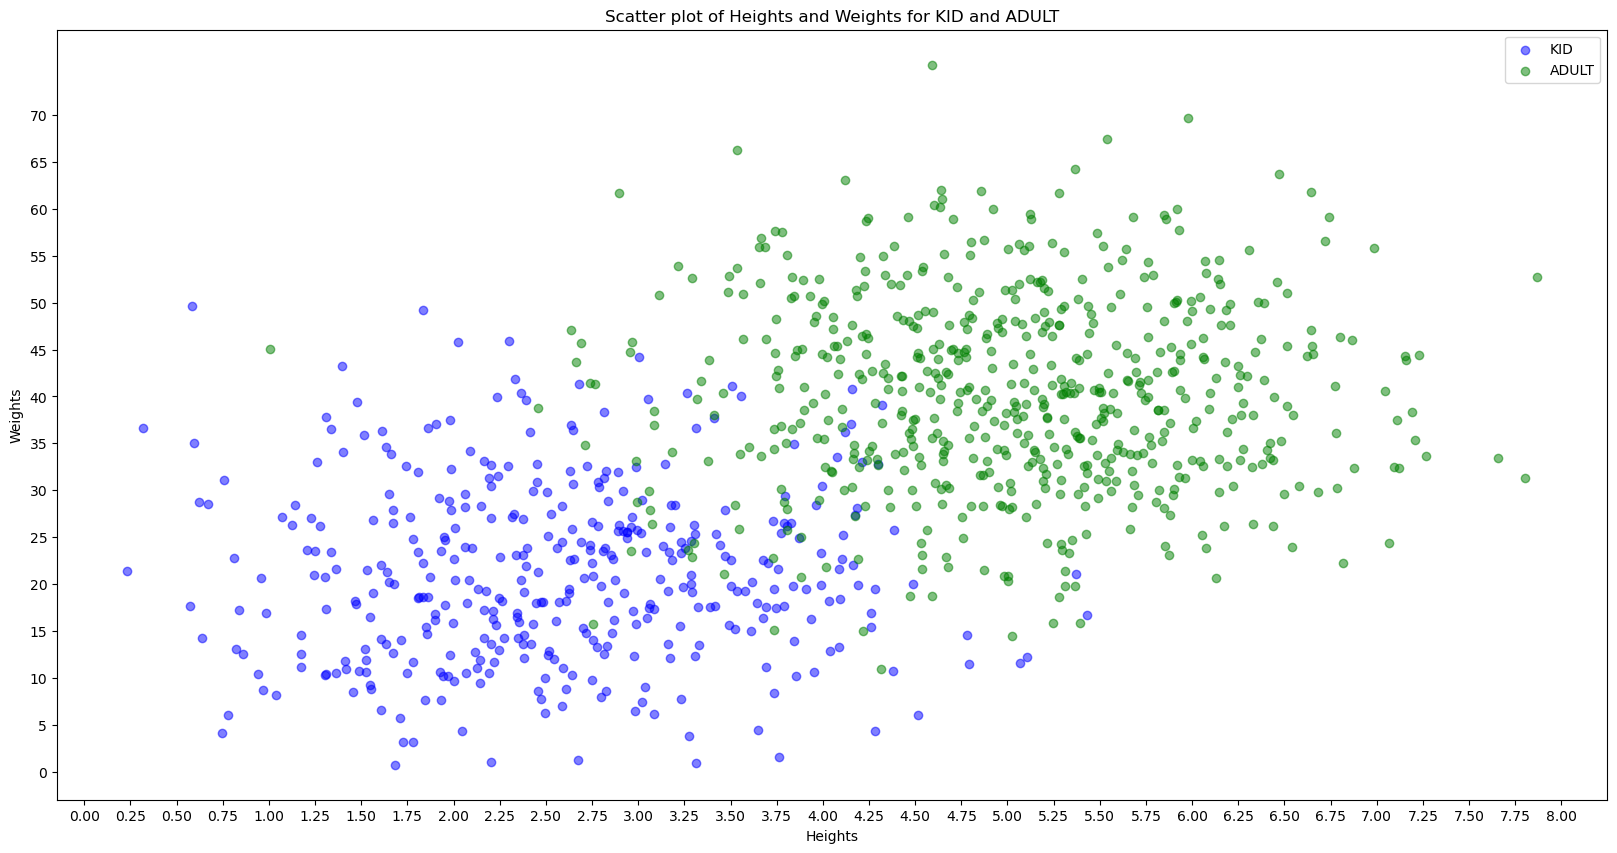

In [53]:
plt.figure(figsize=(20,10))

plt.scatter(heights_of_kid_gaussian, weights_of_kid_gaussian, color = 'blue', alpha=0.5, label = 'KID')

plt.scatter(heights_of_adult_gaussian, weights_of_adult_gaussian, color = 'green', alpha=0.5, label = 'ADULT')


plt.xlabel('Heights')
plt.ylabel('Weights')
plt.xticks(np.arange(0,8.25,0.25))
plt.yticks(np.arange(0,75,5))
plt.title('Scatter plot of Heights and Weights for KID and ADULT')
plt.legend(loc='upper right')
plt.show()


(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

In [54]:
# 2e

def distance(a: int, b: int, c: int, d: int):
  return np.sqrt((c-a)**2 + (d-b)**2)



In [55]:

def knn(k: int, height: float, weight: float, kid_objects_gaussian: list, adult_objects_gaussian: list):
  
  list_to_sort = []

  height_weight_kids = [
    isinstance(kid, Kid) and (kid.kid_height, kid.kid_weight, 'kid', kid) for kid in kid_objects_gaussian
  ]

  height_weight_adult = [
    isinstance(adult, Adult) and (adult.adult_height, adult.adult_weight, 'adult', adult) for adult in adult_objects_gaussian
  ]

  # the list 'list_to_sort' have elements of the form (height, weight, person_type)

  for element in height_weight_kids:
    list_to_sort.append((distance(height, weight, element[0], element[1]), element[2], element[3]))
  for element in height_weight_adult:
    list_to_sort.append((distance(height, weight, element[0], element[1]), element[2], element[3]))

  # print(list_to_sort)

  list_to_sort.sort()
  
  object_list_knn = []
  for i in range(len(list_to_sort)):
    object_list_knn.append(list_to_sort[i][2])

  k_nearest_objects = object_list_knn[0:k].copy()
  
  other_objects = object_list_knn[k:].copy()

  height_knn = []
  weight_knn = []

  for object_element in k_nearest_objects:
    if isinstance(object_element, Kid):
      height_knn.append(object_element.kid_height)
      weight_knn.append(object_element.kid_weight)
    elif isinstance(object_element, Adult):
      height_knn.append(object_element.adult_height)
      weight_knn.append(object_element.adult_weight)

  height_others = []
  weight_others = []

  for object_element in other_objects:
    if isinstance(object_element, Kid):
      height_others.append(object_element.kid_height)
      weight_others.append(object_element.kid_weight)
    elif isinstance(object_element, Adult):
      height_others.append(object_element.adult_height)
      weight_others.append(object_element.adult_weight)
  




  plt.figure(figsize=(20,10))

  plt.scatter(
    [height], [weight],
    color = 'blue',
    label = 'input'
  )
  plt.scatter(
    height_knn, weight_knn,
    color = 'green',
    label = f'{k} Nearest Neighbours'
  )

  plt.scatter(
    height_others, weight_others,
    color = 'yellow',
    label = 'Others'
  )
  plt.title('K nearest Neighbours')
  plt.legend(loc = 'upper right')
  plt.xlabel('Heights')
  plt.ylabel('Weights')
  # plt.xticks(np.arange(0,8.25,0.25))
  # plt.yticks(np.arange(0,75,5))
  # plt.xticks(np.arange(0,71,1))
  # plt.yticks(np.arange(0,9,1))
  plt.show()


  return list_to_sort[0:k]




#### The nearest neighbours may not seem like nearest neighbours because of the scale of the figure

#### For that, the scale of x axis and y axis should be the same

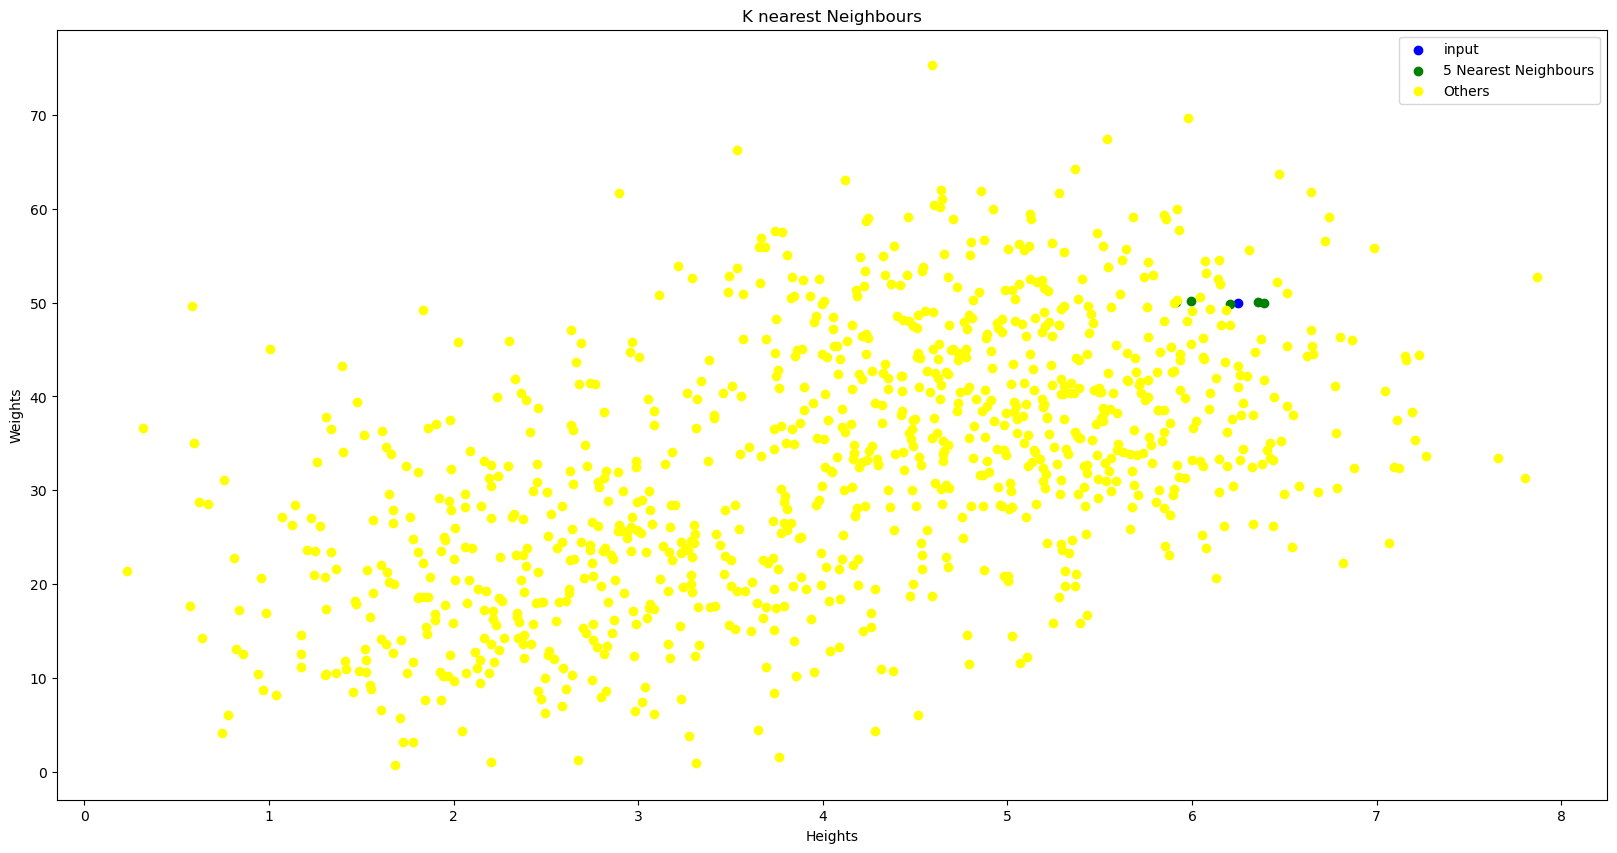

In [56]:
lst = knn(5, 6.25,50, kid_objects_gaussian, adult_objects_gaussian)

In [57]:

def majority_function(knn_list: list) -> str:
  # this function predicts if it is kid or adult

  count_kid = 0
  count_adult = 0
  for element in knn_list:
    if element[1] == 'kid':
      count_kid += 1
    else:
      count_adult += 1
  
  return 'kid' if count_kid > count_adult else 'adult'


In [58]:
majority_function(lst)

'adult'

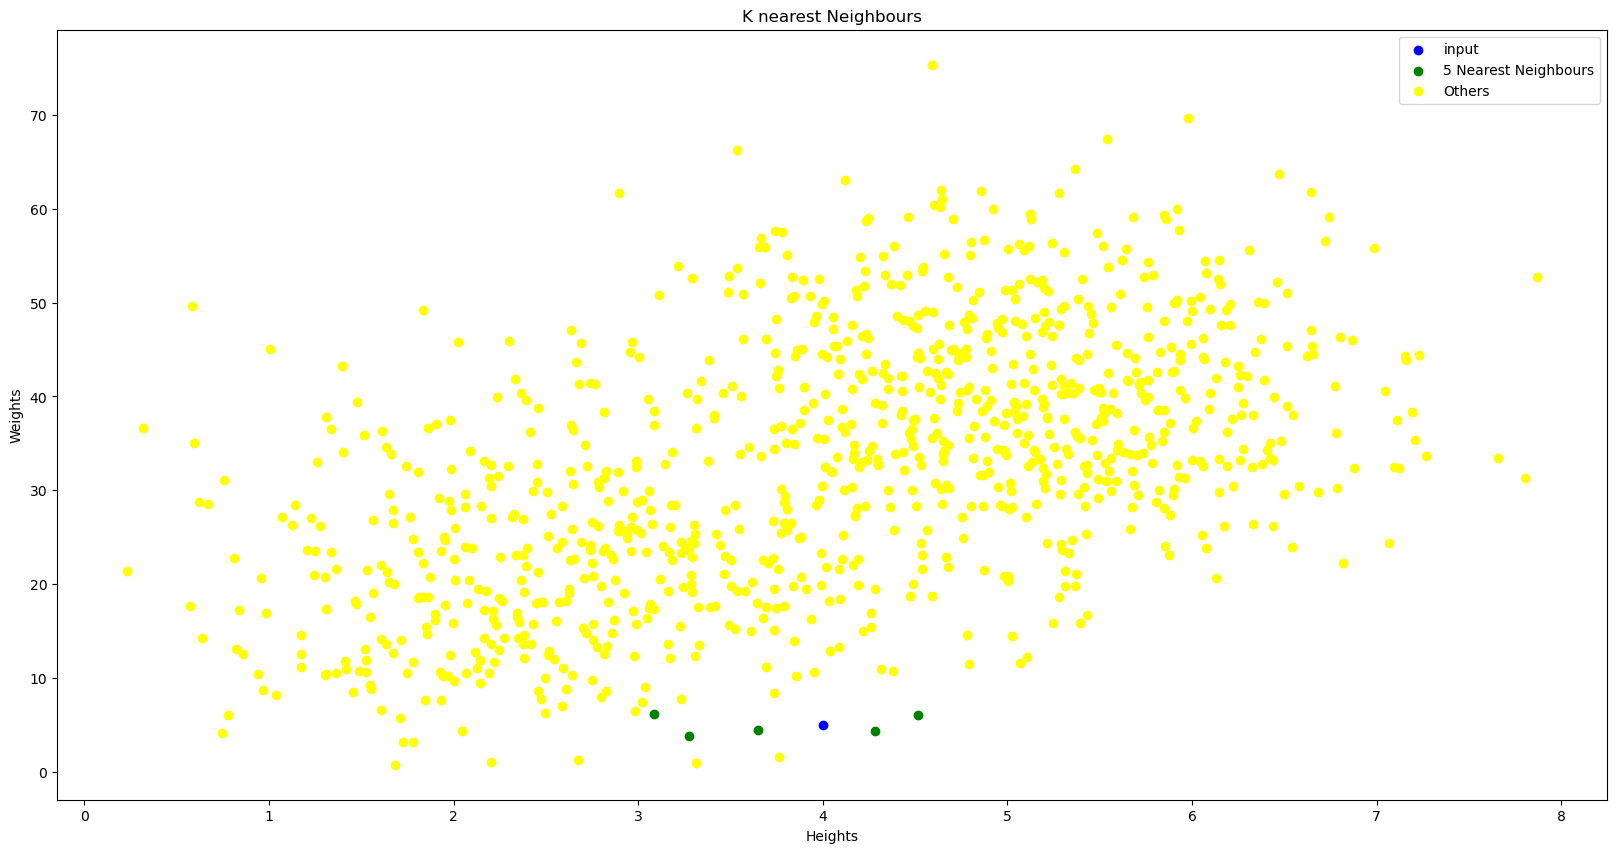

Prediction using 5 Nearest neighbours is kid


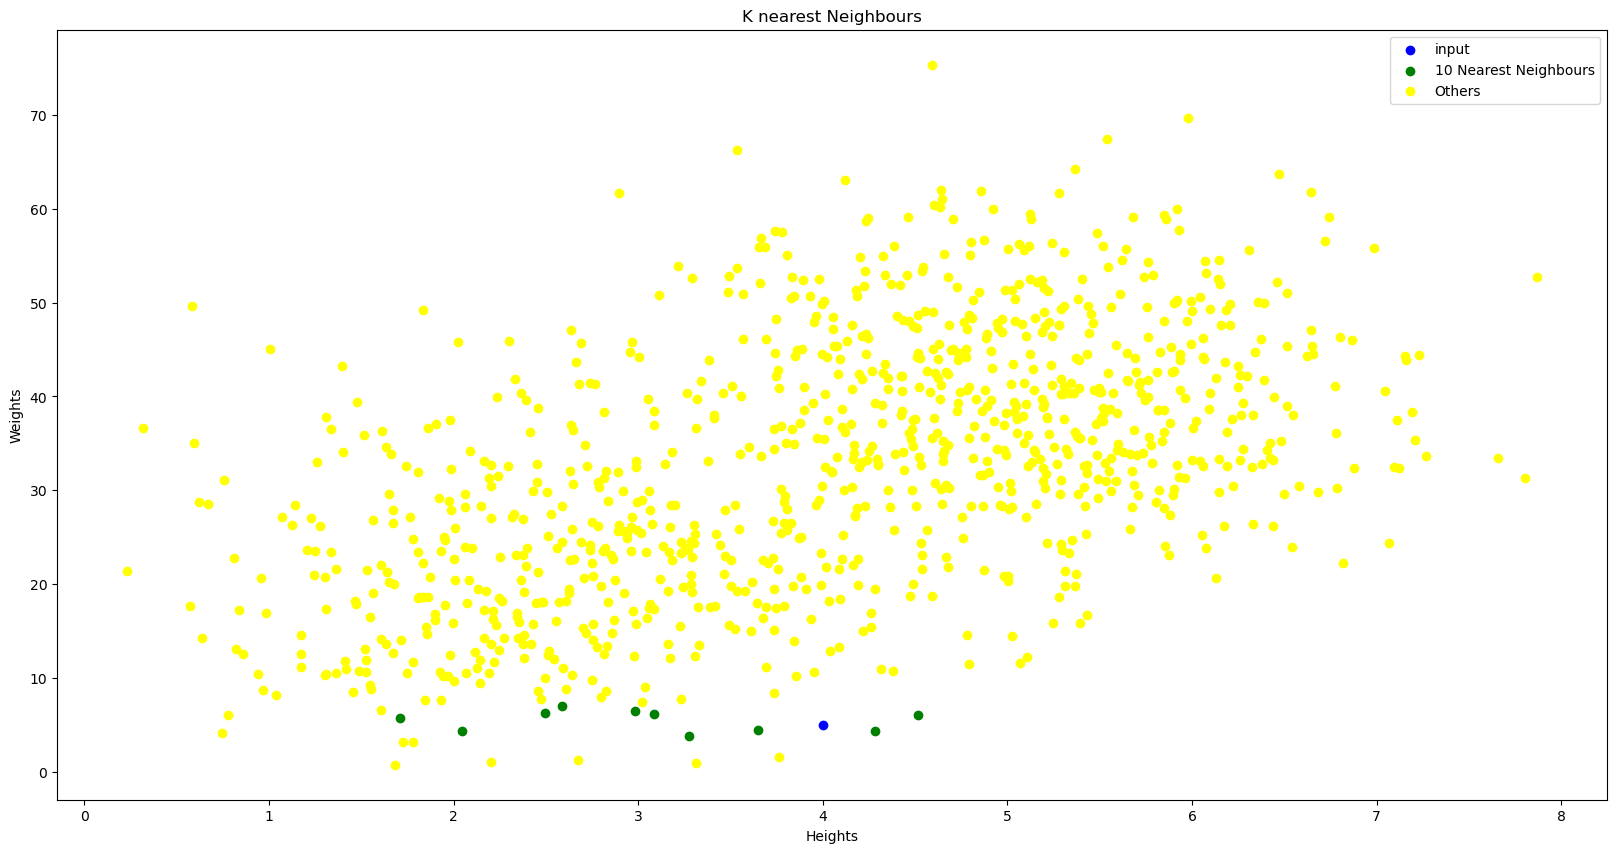

Prediction using 10 Nearest neighbours is kid


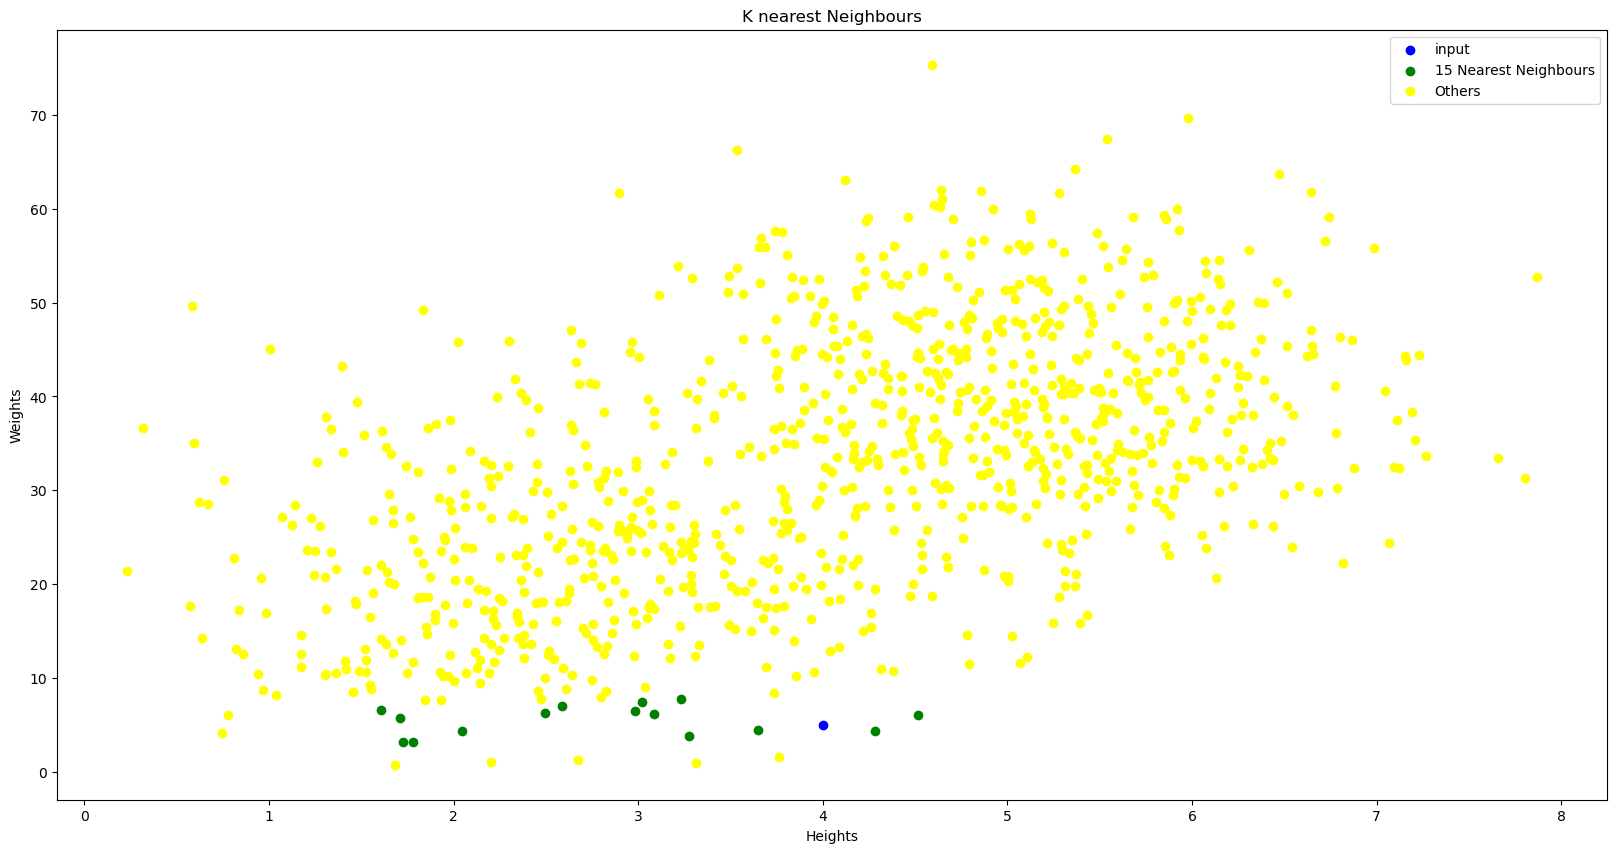

Prediction using 15 Nearest neighbours is kid


In [59]:

def input_height_weight():
  return tuple(map(float, input().split()))

height, weight = input_height_weight()

prediction = majority_function(knn(5, height, weight, kid_objects_gaussian, adult_objects_gaussian))
print(f'Prediction using 5 Nearest neighbours is {prediction}')
prediction = majority_function(knn(10, height, weight, kid_objects_gaussian, adult_objects_gaussian))
print(f'Prediction using 10 Nearest neighbours is {prediction}')
prediction = majority_function(knn(15, height, weight, kid_objects_gaussian, adult_objects_gaussian))
print(f'Prediction using 15 Nearest neighbours is {prediction}')






# Optimal First Batting Strategy 

Recall the cricket game simulation that we discussed in Assignment 2. Consider a one-day cricket match. Each
innings consists of 300 balls ignoring no balls, runouts and overthrows. At any point of time, treat the pair of batsmen playing as a single player. That is, there are 10 players, namely, $(1, 2),(2, 3), \ldots ,(10, 11)$. For every player, there are 5 possible shots: $A=\{1, 2, 3, 4, 6\}$. Each of these shots is associated with the risk of the player getting dismissed and this risk varies from player to player. The probabilities of getting dismissed for Player $(1, 2)$ is $pOutMin = [0.01, 0.02, 0.03, 0.1, 0.3]$ and for Player $(10, 11)$ is $pOutMax = [0.1, 0.2, 0.3, 0.5, 0.7]$,  where the ith entry is for the ith action. If there are $w$ wickets in hand, then use the formula 

$$pOut(a, w) = pOutMax(a) + (pOutMin(a) - pOutMax(a)) \times (w- 1)/9)$$ 

to calculate the probabilities of Player $(11-w, 11-w+1)$ getting dismissed for  where $w \in [10]$. Note that $pOut(a, 1)=pOutMin(a)$ and $pOut(a, 10)=pOutMax(a)$. You may assume that if the player does not get out, then the runs corresponding to the shot played is scored.



In [60]:
import random as rnd
import matplotlib.pyplot as plt

In [61]:

class Player:
  def __init__(self,index) -> None:
    # index is starting from 1
    self.indexOfPlayer = index
    self.player_tuple = (index,index+1)
    self.runs = 0
    self.isOut = False
    self.balls_played_by_thisPlayer = 0
    self.shots = [1,2,3,4,6]


    pOutMax = [0.1,0.2,0.3,0.5,0.7]
    pOutMin = [0.01,0.02,0.03,0.1,0.3]
    pOut = []
    if index==1:
      pOut = pOutMin
    elif index==10:
      pOut = pOutMax
    else:
      w = 11-index
      pOut = [
        pOutMax[i] - (pOutMax[i] - pOutMin[i])*(w-1)/9

        for i in range(5)
      ]
    
    self.pOutList = pOut

    pRunMin = 0.5
    pRunMax = 0.8
    if index==1:
      pRun = pRunMax
    elif index == 10:
      pRun = pRunMin
    else:
      w = 11 - index
      pRun = pRunMin + (pRunMax - pRunMin)*(w-1)/9
    self.pRun = pRun

  # for debugging purpose
  # printing the info of this player
  def print_state_of_player(self):
    print(f'the player index is {self.indexOfPlayer}')
    print(f'player is {self.player_tuple}')
    print(f'Runs scored is {self.runs}')
    print(f'Is the player out ? : {self.isOut}')
    print(f'probability of getting out: {self.pOutList}')
    print(f'probability of scoring runs: {self.pRun}')
    print(f'The number of balls played by this player is {self.balls_played_by_thisPlayer}')

  def player_playBall(self,a_t=0):
    a_t = int(input()) if a_t == 0 else a_t
    if a_t == 5:
      print('no such run')
      return
    self.balls_played_by_thisPlayer+=1
    # increment the number of balls played
    indexOfShot = self.shots.index(a_t)
    pOut_shot = self.pOutList[indexOfShot]
    # prob that the attempt to shoot a_t results in a wicket
    isOut = rnd.choices(
      [True,False],
      weights=[pOut_shot,1-pOut_shot],
      k=1
    )[0]
    if isOut:
      self.isOut = True
    else:
      pRun = self.pRun
      doesScore = rnd.choices(
        [True,False],
        weights=[pRun,1-pRun],
        k=1
      )[0]
      if doesScore:
        self.runs += a_t



In [62]:


class ODI:
  
  def __init__(self,player:Player = None) -> None:
    self.ballsPlayed = 0
    self.ballsLeft = 300
    self.totalRuns = 0
    self.players = [Player(i+1) for i in range(10)]
    # list of player
    self.isActive = True
    self.currentPlayerIndex = 1
    # first player will be player 1
    self.currentPlayerObject = self.players[self.currentPlayerIndex - 1]
    # player object of the current player

    self.wicketsTaken = 0
    self.wicketsInHand = 10
    self.currentState = (self.ballsLeft,self.wicketsInHand)


  def print_state_of_odi(self):
    print(f'The number of balls played and balls remaining is {self.ballsPlayed} and {self.ballsLeft} respectively')
    print(f'Total Runs: {self.totalRuns}')
    print(f'The current player index is {self.currentPlayerIndex}')
    print(f'the current player is {self.currentPlayerObject.player_tuple}')
    print(f'wickets taken: {self.wicketsTaken}')
    print(f'wickets in hand: {self.wicketsInHand}')
    print(f'the current state of odi: {self.currentState}')

  def ballPlayed(self,whoPlayedTheBall: Player,runs_scored = 0,is_wicket = False):
    # whoPlayedTheBall is a player object
    if self.ballsPlayed == 300:
      self.isActive = False
      return
    
    self.ballsPlayed += 1
    self.ballsLeft -= 1
    whoPlayedTheBall.balls_played_by_thisPlayer+=1

    if is_wicket:
      # if wicket happens
      self.wicketsTaken += 1
      self.wicketsInHand -= 1
      # what if current player index crosses 10
      if self.currentPlayerIndex == 10:
        self.isActive = False
        return
      self.currentPlayerIndex += 1
      self.currentPlayerObject = self.players[self.currentPlayerIndex - 1]
      whoPlayedTheBall.isOut = True
      self.currentState = (self.ballsLeft,self.wicketsInHand)


    else:
      whoPlayedTheBall.runs += runs_scored
      self.totalRuns += runs_scored


In [63]:
def playBall(odi: ODI,a_t = 0, run_prob = True) -> tuple:
  a_t = int(input()) if a_t == 0 else a_t
  if a_t == 5:
    print('no such run')
    return (0,odi.currentState)
  playerObject = odi.currentPlayerObject
  indexOfShot = playerObject.shots.index(a_t)
  # print(indexOfShot)
  
  pOutList  = playerObject.pOutList
  # pRun = playerObject.pRun
  # print(pOutList)
  isOut = rnd.choices(
    [True,False], 
    weights=[pOutList[indexOfShot],1-pOutList[indexOfShot]],
    k=1
  )[0]
  if isOut:
    odi.ballPlayed(playerObject,is_wicket=True)
    return (0,odi.currentState)
  else:
    pRun = playerObject.pRun
    doesScoreRun = True
    # if we take into account, the probability of taking the run
    if run_prob:
      doesScoreRun = rnd.choices(
        [True,False],
        weights=[pRun,1-pRun],
        k=1
      )[0]
    if not doesScoreRun:
      # dot ball
      odi.ballPlayed(playerObject)
      return (0,odi.currentState)
    else:
      runsScored = a_t
      odi.ballPlayed(playerObject,runs_scored=runsScored)
      return (runsScored,odi.currentState)


Let us formulate an optimal strategy for the team batting first. Let $b$ be the number of balls left and $w$ be the wickets in hand. Let $BestScore(b,w)$ be the
maximum expected score under an optimal policy in the remaining $b$ balls with $w$ wickets in hand. Note that no matter what the actual score is, the player should maximize the expected score in the remaining part of the game. Use the boundary conditions $BestScore(0,w)=0$ for each $w$ and $BestScore(b,0)=0$ for each $b$. 

Hint: For $b \in [300]$ and $w \in [10]$, $BestScore(b,w)=\max_a (a+BestScore(b-1,w))$ if the player does not get out in the $b$ th ball and $BestScore(b,w)=\max_a BestScore(b-1,w-1)\}$ if the player gets out in the $b$ th ball.






In [64]:
bestScore = [
  [-1 for _ in range(11)] for _ in range(301)
]
bestShot = [
  [-1 for _ in range(11)] for _ in range(301)
]

In [65]:

def BestScore(b: int, w: int, bestScore: list):
  return bestScore[b-1][w-1]
  
for w in range(11):
  bestScore[0][w] = 0

for b in range(301):
  bestScore[b][0] = 0





In [66]:
# BestScore(5,5, bestScore)


# for row in bestScore:
#   print(row)


(a) Implement an optimal batting-first strategy by computing $BestScore(b,w)$ for each $b \in [300]$ and $w \in [10] \cup \{0\}$ using dynamic programming. Simulate 10 matches and bat according to the optimal policy. Output the optimal action (the recommended shot $BestShot(b,w)$) and the value (total expected score $BestScore(b,w)$ in the remainder of the game) for each pair $(b,w)$ where $b$ is the number of balls left and $w$ is the number of wickets left. Note that $BestShot(b,w)$ denotes the shot to be taken when there are $b$ balls and $w$ wickets left so that $BestScore(b,w)$ is attained. 



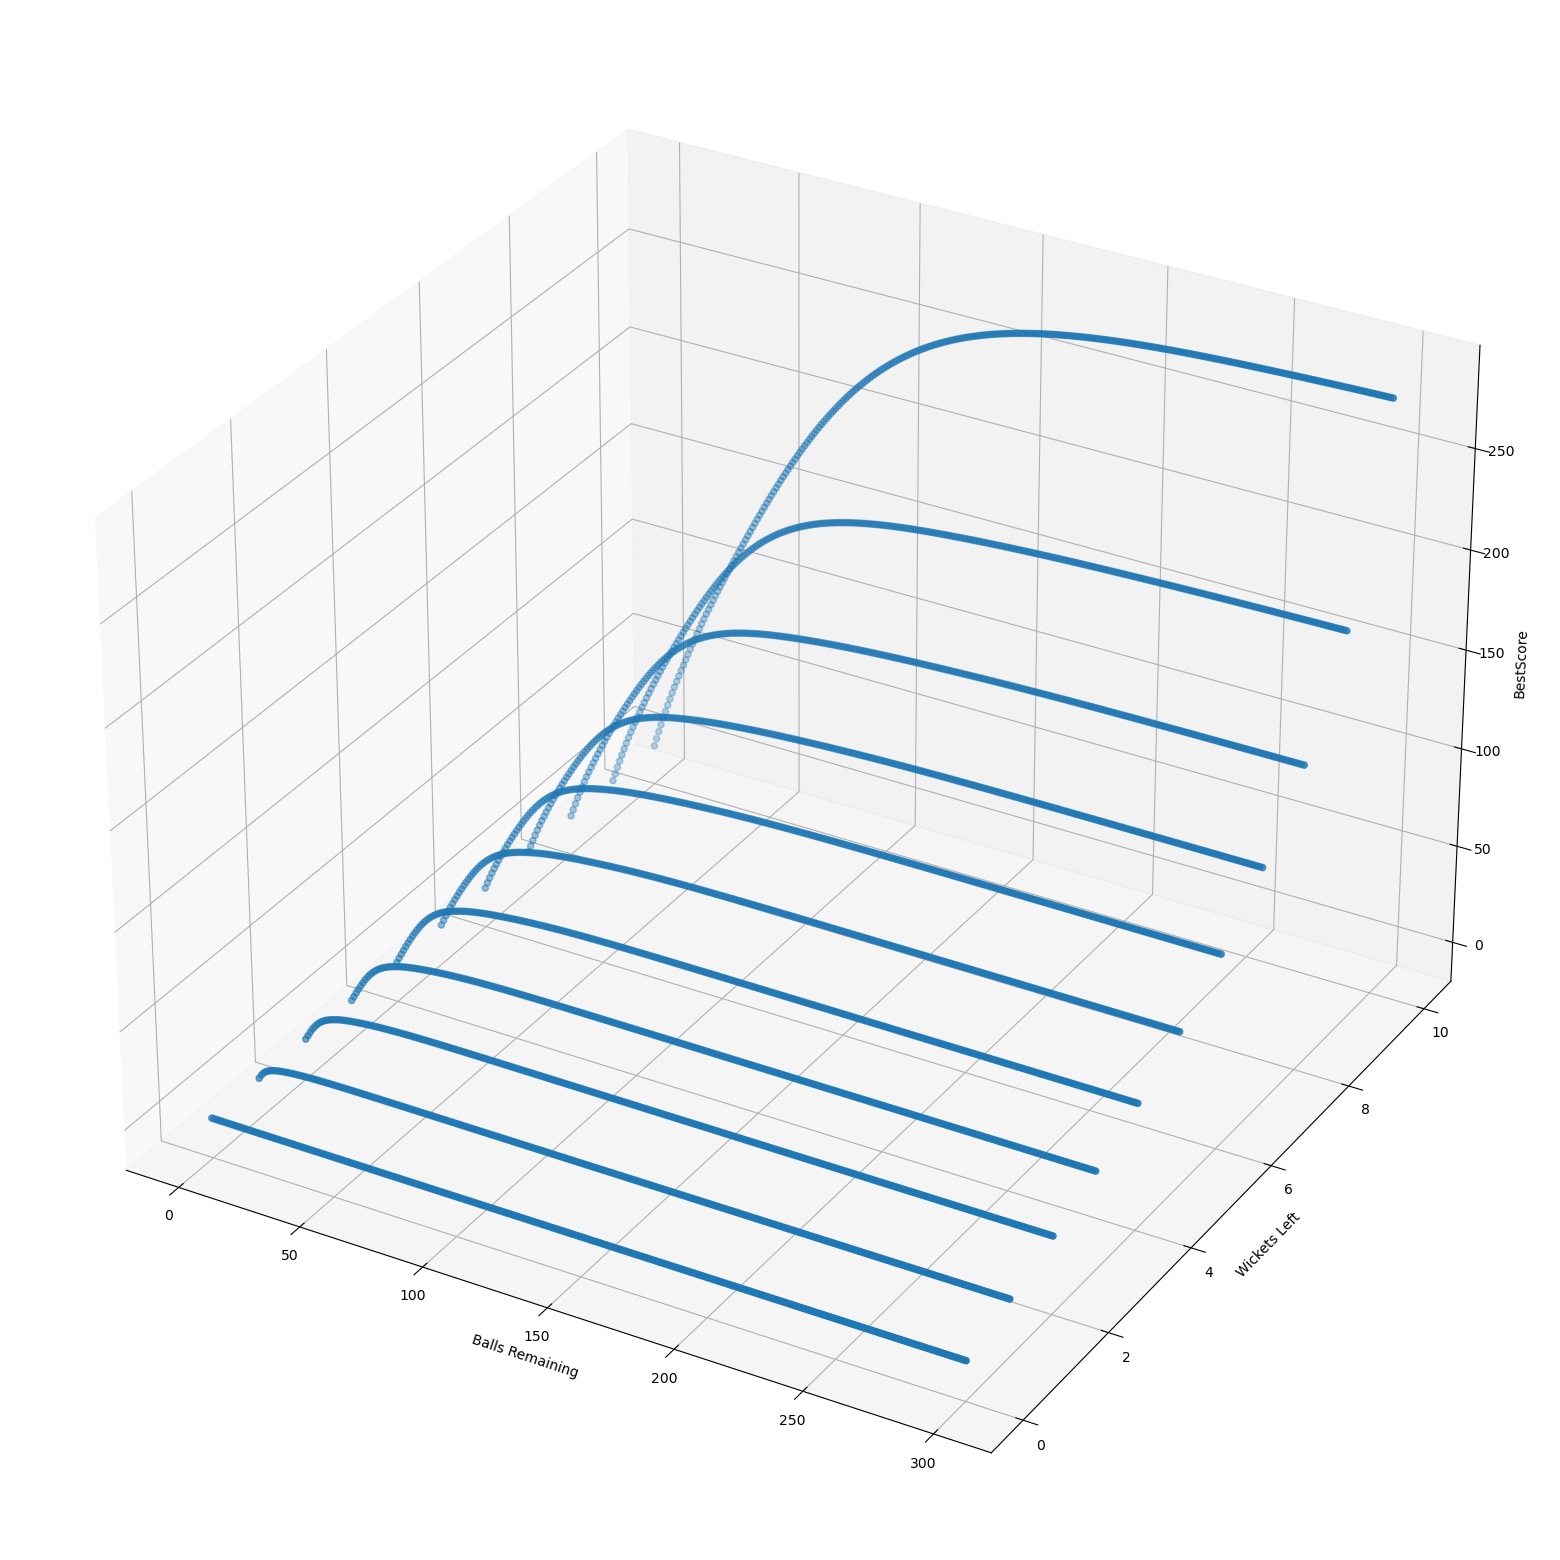

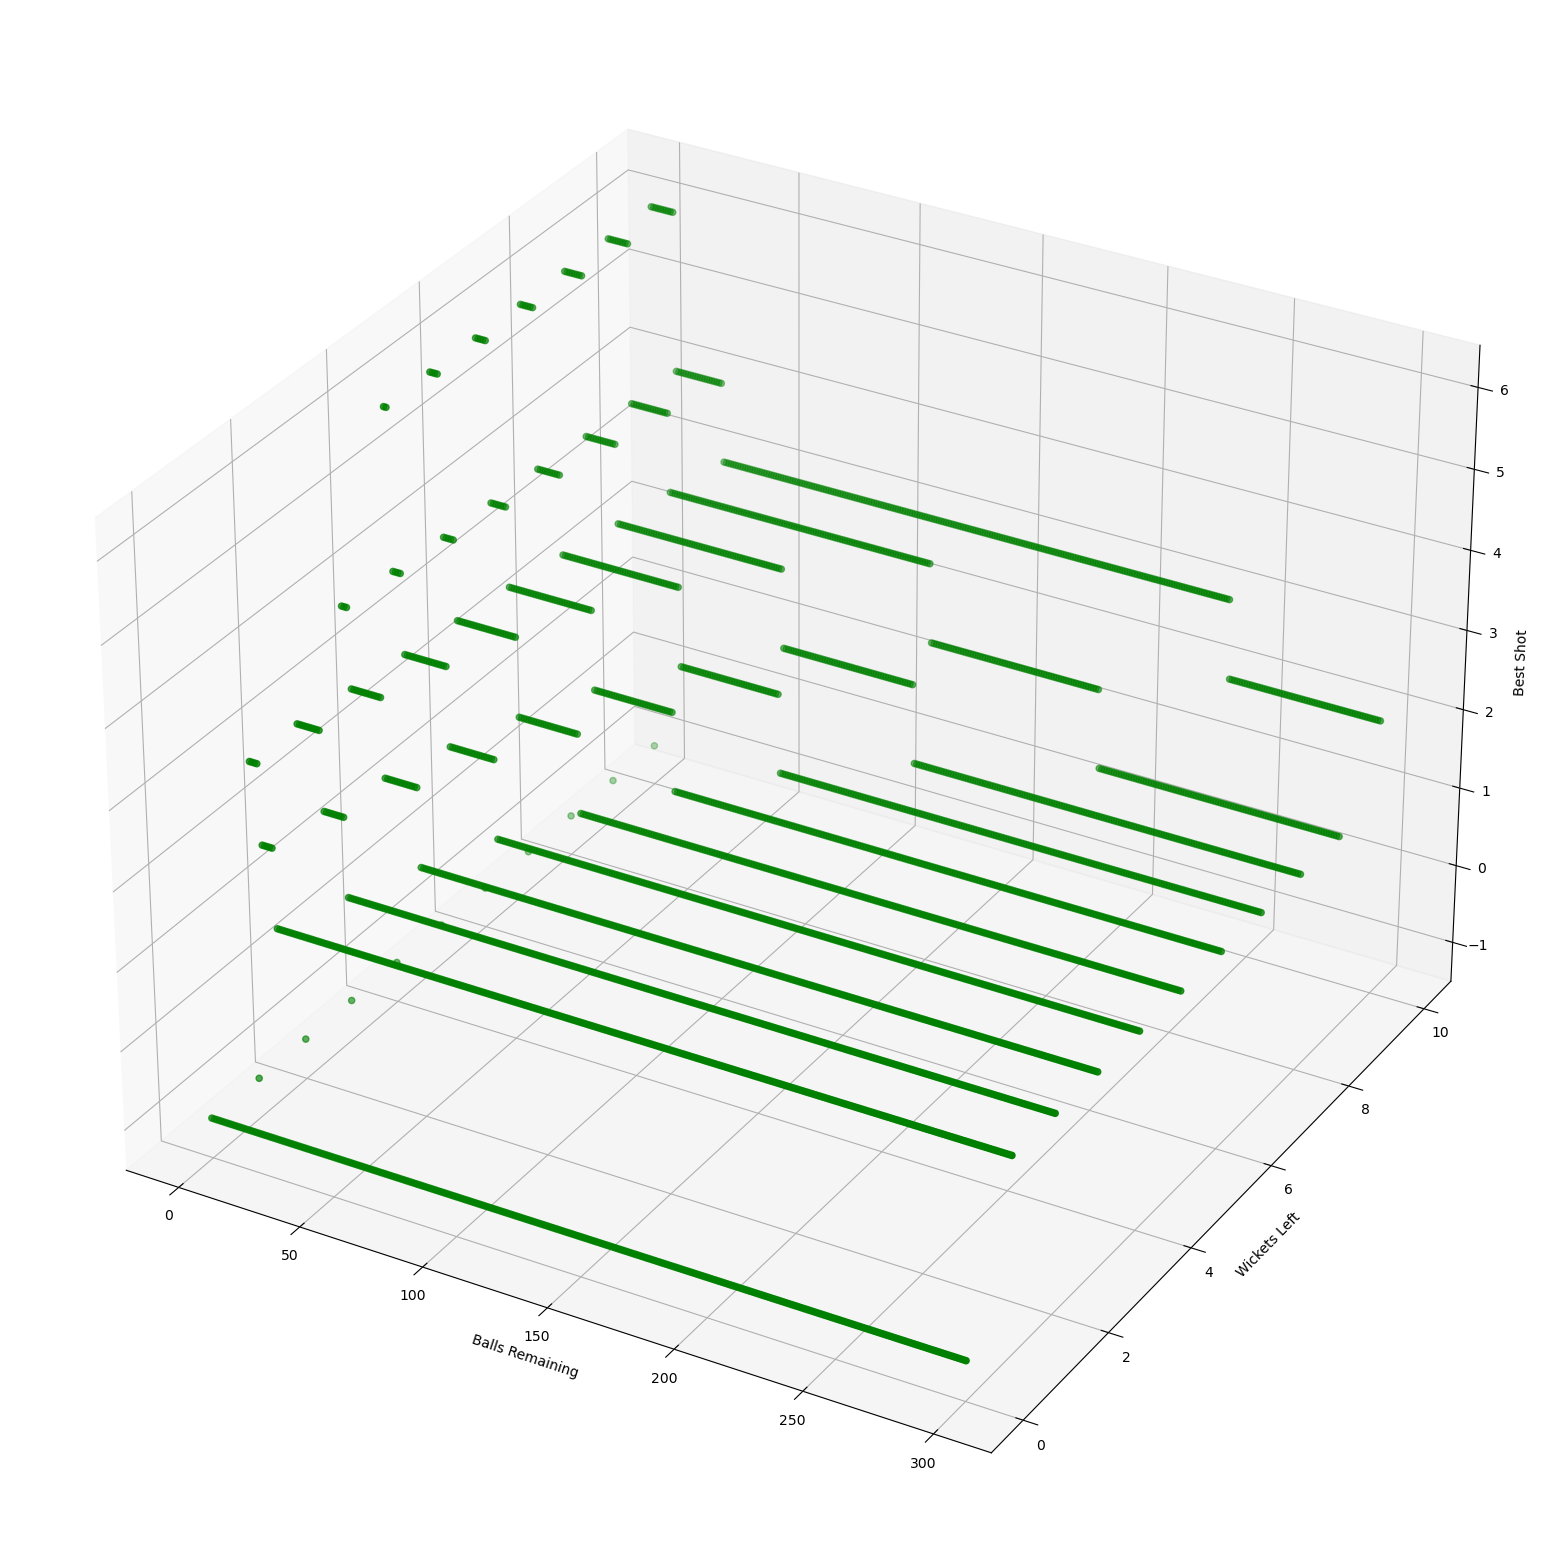

In [67]:


# the dynamic programming equation is 
# bestScore(b,w) = MAX{
#   a + prob_not_out_when_scoring_a * bestScore(b-1,w) + prob_out_when_scoring_a * bestScore(b-1,w-1)
#   
# }




for b in range(1,301):
  for w in range(1,11):
    # if there are w wickets left, the player playing is 11-w
    # for example, if there is 1 wicket left, the player is (10,11)
    player = Player(11-w)
    shots = player.shots
    # pRun = player.pRun
    prob_run = 1
    pOutList = player.pOutList
    max_action = 0
    max_shot = 0
    for i in range(len(shots)):
      action = shots[i]
      # pRun = player.pRun

      # here since there is no pRunMin and pRunMax, pRun is one
      pRun = 1
      # pRun = prob_run[i]
      pOut = pOutList[i]
      z = (1-pOut) * ((pRun * action) + bestScore[b-1][w]) + (pOut * bestScore[b-1][w-1])
      if z > max_action:
        max_action = z
        max_shot = action
    del player
    bestScore[b][w] = max_action
    bestShot[b][w] = max_shot

# for row in bestScore:
#   print(row)

# print(bestScore[300][10])
# for w in range(11):
#   for b in range(301):
#     print(bestScore[b][w], end=', ')
#   print()

b_list = []
w_list = []
score = []
shots = []
for b in range(301):
  for w in range(11):
    b_list.append(b)
    w_list.append(w)
    score.append(bestScore[b][w])
    shots.append(bestShot[b][w])


plt.figure(figsize=(20,20))
ax1 = plt.axes(projection = '3d')
ax1.scatter(b_list, w_list, score)
ax1.set_xlabel('Balls Remaining')
ax1.set_ylabel('Wickets Left')
ax1.set_zlabel('BestScore')
# ax.set_xticklabels('Hello')


# plt.scatter(b_list, w_list)
plt.show()

plt.figure(figsize=(20,20))
ax1 = plt.axes(projection = '3d')
ax1.scatter(b_list, w_list, shots, color = 'green')
ax1.set_xlabel('Balls Remaining')
ax1.set_ylabel('Wickets Left')
ax1.set_zlabel('Best Shot')
# ax.set_xticklabels('Hello')


# plt.scatter(b_list, w_list)
plt.show()






(a) Implement an optimal batting-first strategy by computing $BestScore(b,w)$ for each $b \in [300]$ and $w \in [10] \cup \{0\}$ using dynamic programming. Simulate 10 matches and bat according to the optimal policy. Output the optimal action (the recommended shot $BestShot(b,w)$) and the value (total expected score $BestScore(b,w)$ in the remainder of the game) for each pair $(b,w)$ where $b$ is the number of balls left and $w$ is the number of wickets left. Note that $BestShot(b,w)$ denotes the shot to be taken when there are $b$ balls and $w$ wickets left so that $BestScore(b,w)$ is attained. 



In [68]:
for i in range(300,0,-1):
  for j in range(10,0,-1):
    print(f'Best Shot with {i} balls remaining and {j} wickets remaining is {bestShot[i][j]}')

Best Shot with 300 balls remaining and 10 wickets remaining is 2
Best Shot with 300 balls remaining and 9 wickets remaining is 1
Best Shot with 300 balls remaining and 8 wickets remaining is 1
Best Shot with 300 balls remaining and 7 wickets remaining is 1
Best Shot with 300 balls remaining and 6 wickets remaining is 1
Best Shot with 300 balls remaining and 5 wickets remaining is 1
Best Shot with 300 balls remaining and 4 wickets remaining is 1
Best Shot with 300 balls remaining and 3 wickets remaining is 1
Best Shot with 300 balls remaining and 2 wickets remaining is 1
Best Shot with 300 balls remaining and 1 wickets remaining is 1
Best Shot with 299 balls remaining and 10 wickets remaining is 2
Best Shot with 299 balls remaining and 9 wickets remaining is 1
Best Shot with 299 balls remaining and 8 wickets remaining is 1
Best Shot with 299 balls remaining and 7 wickets remaining is 1
Best Shot with 299 balls remaining and 6 wickets remaining is 1
Best Shot with 299 balls remaining and

In [69]:
optimal_runs = 0


for _ in range(10):
  odi = ODI()
  numBalls = 0
  while numBalls < 300 and odi.isActive:
    currentPlayer_index = odi.currentPlayerIndex
    wickets_remaining = 11 - currentPlayer_index
    playBall(odi, bestShot[300 - numBalls][wickets_remaining], run_prob= False)
    # if bestShot[300-numBalls][wickets_remaining] == -1:
    #   print('-1 reached')
    numBalls += 1
  optimal_runs += odi.totalRuns
  print(f'Runs scored is {odi.totalRuns}')
  del odi

print(f'The average Runs scored using optimal shot strategy is {optimal_runs/10}')






Runs scored is 386
Runs scored is 299
Runs scored is 197
Runs scored is 467
Runs scored is 131
Runs scored is 519
Runs scored is 581
Runs scored is 590
Runs scored is 250
Runs scored is 416
The average Runs scored using optimal shot strategy is 383.6


(b) What is your observation on the optimal strategy? Is it a good idea to bat slowly during the early part of the game, keeping wickets in hand? This usually allows a steady increase in the scoring rate, and often results in a last-minute orgy of runs and wickets during the final part of the innings. Or is it better to score quickly in the early part of the innings? How would the optimal strategy change if there is a chance that a player does not score the runs for a particular shot despite not getting dismissed. Taking $pRunMin = 0.5$, and $pRunMax = 0.8$,  when the player is not getting out, the probability of successfully obtaining the runs for that shot is given by $pRun(w) = pRunMin + (pRunMax - pRunMin) \times ((w - 1)/9).$

It is a good idea to bat slowly during the early part of the game

In [70]:
bestShot = [
  [-1 for _ in range(11)] for _ in range(301)
]

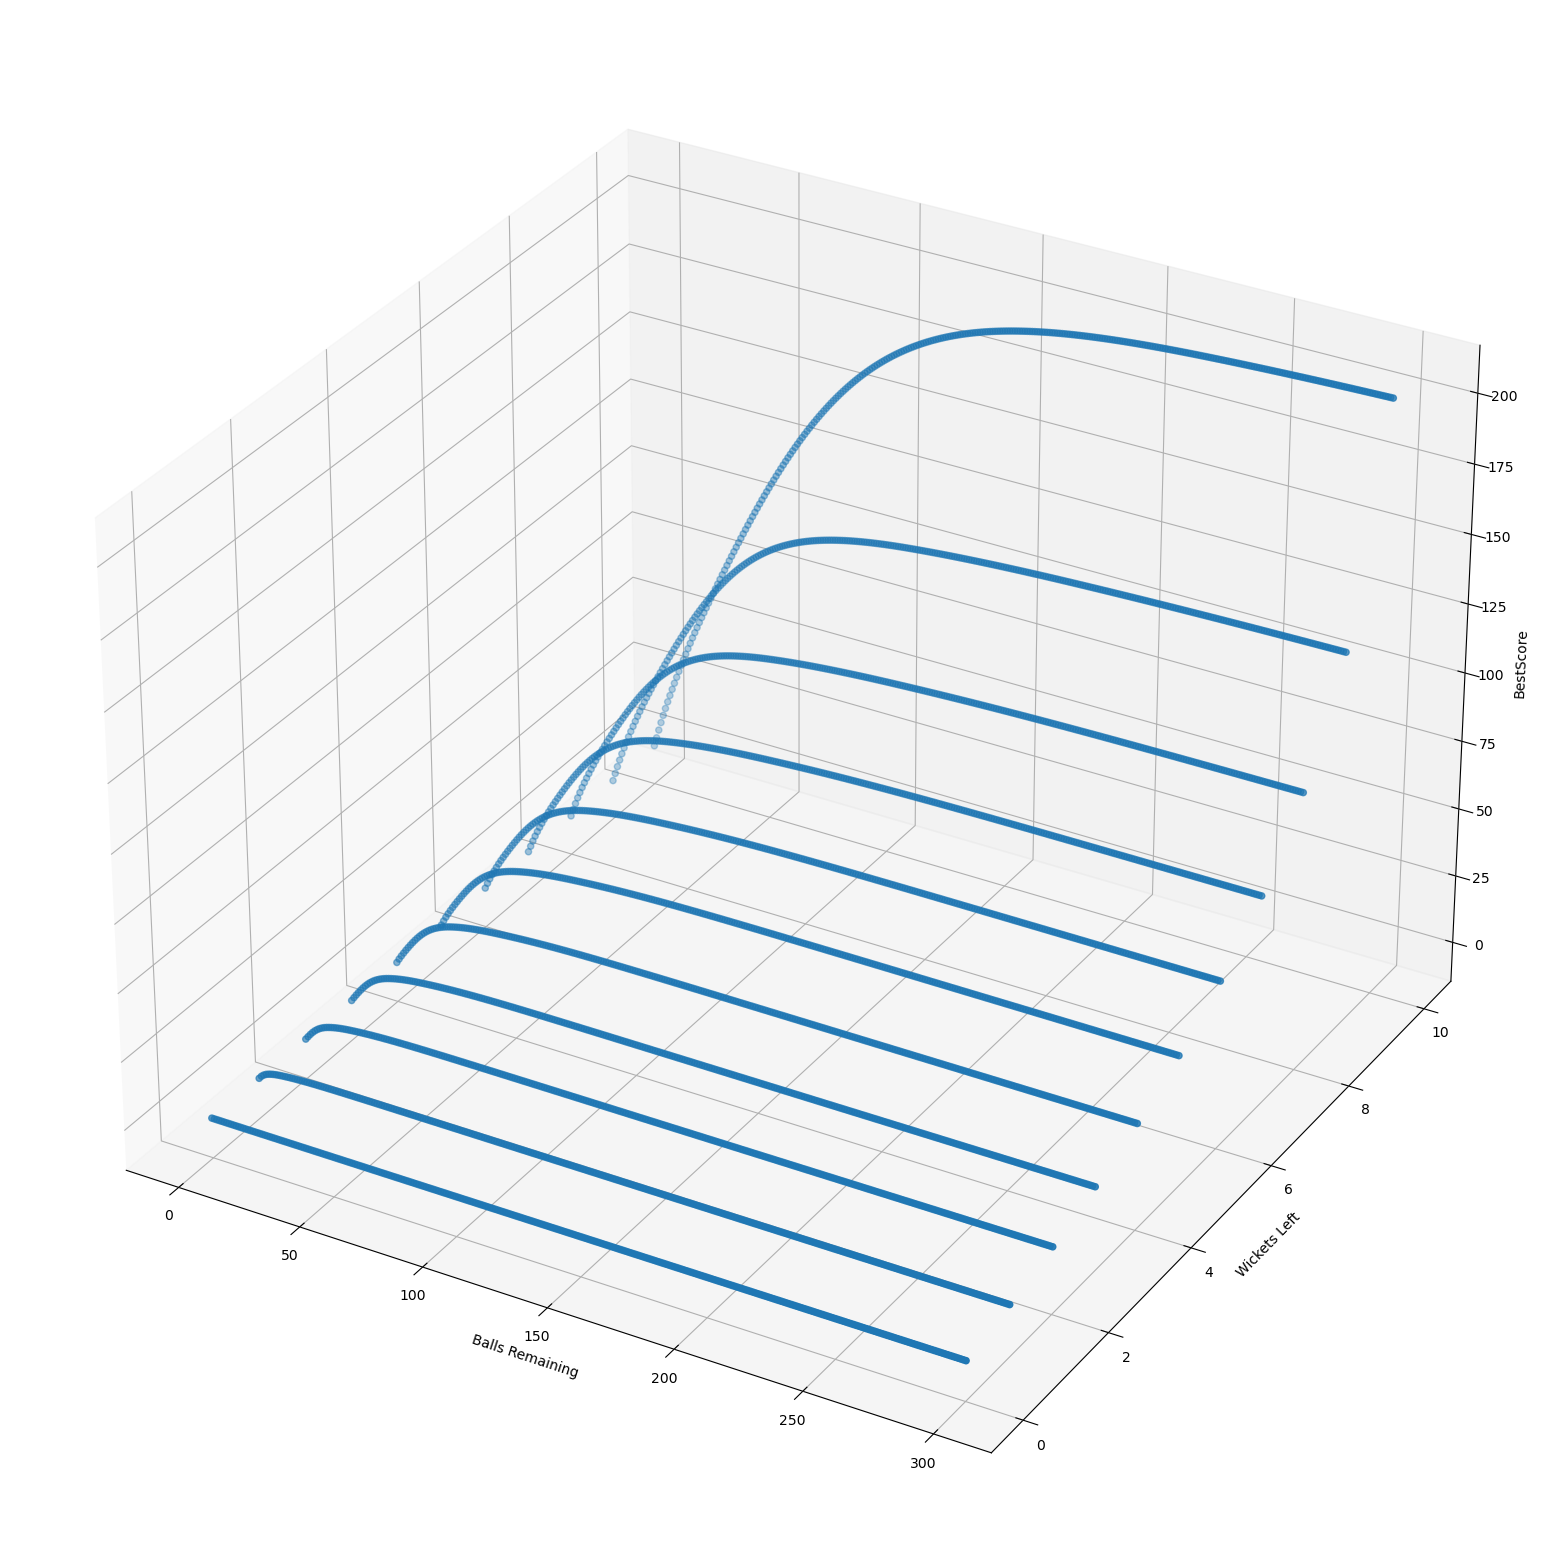

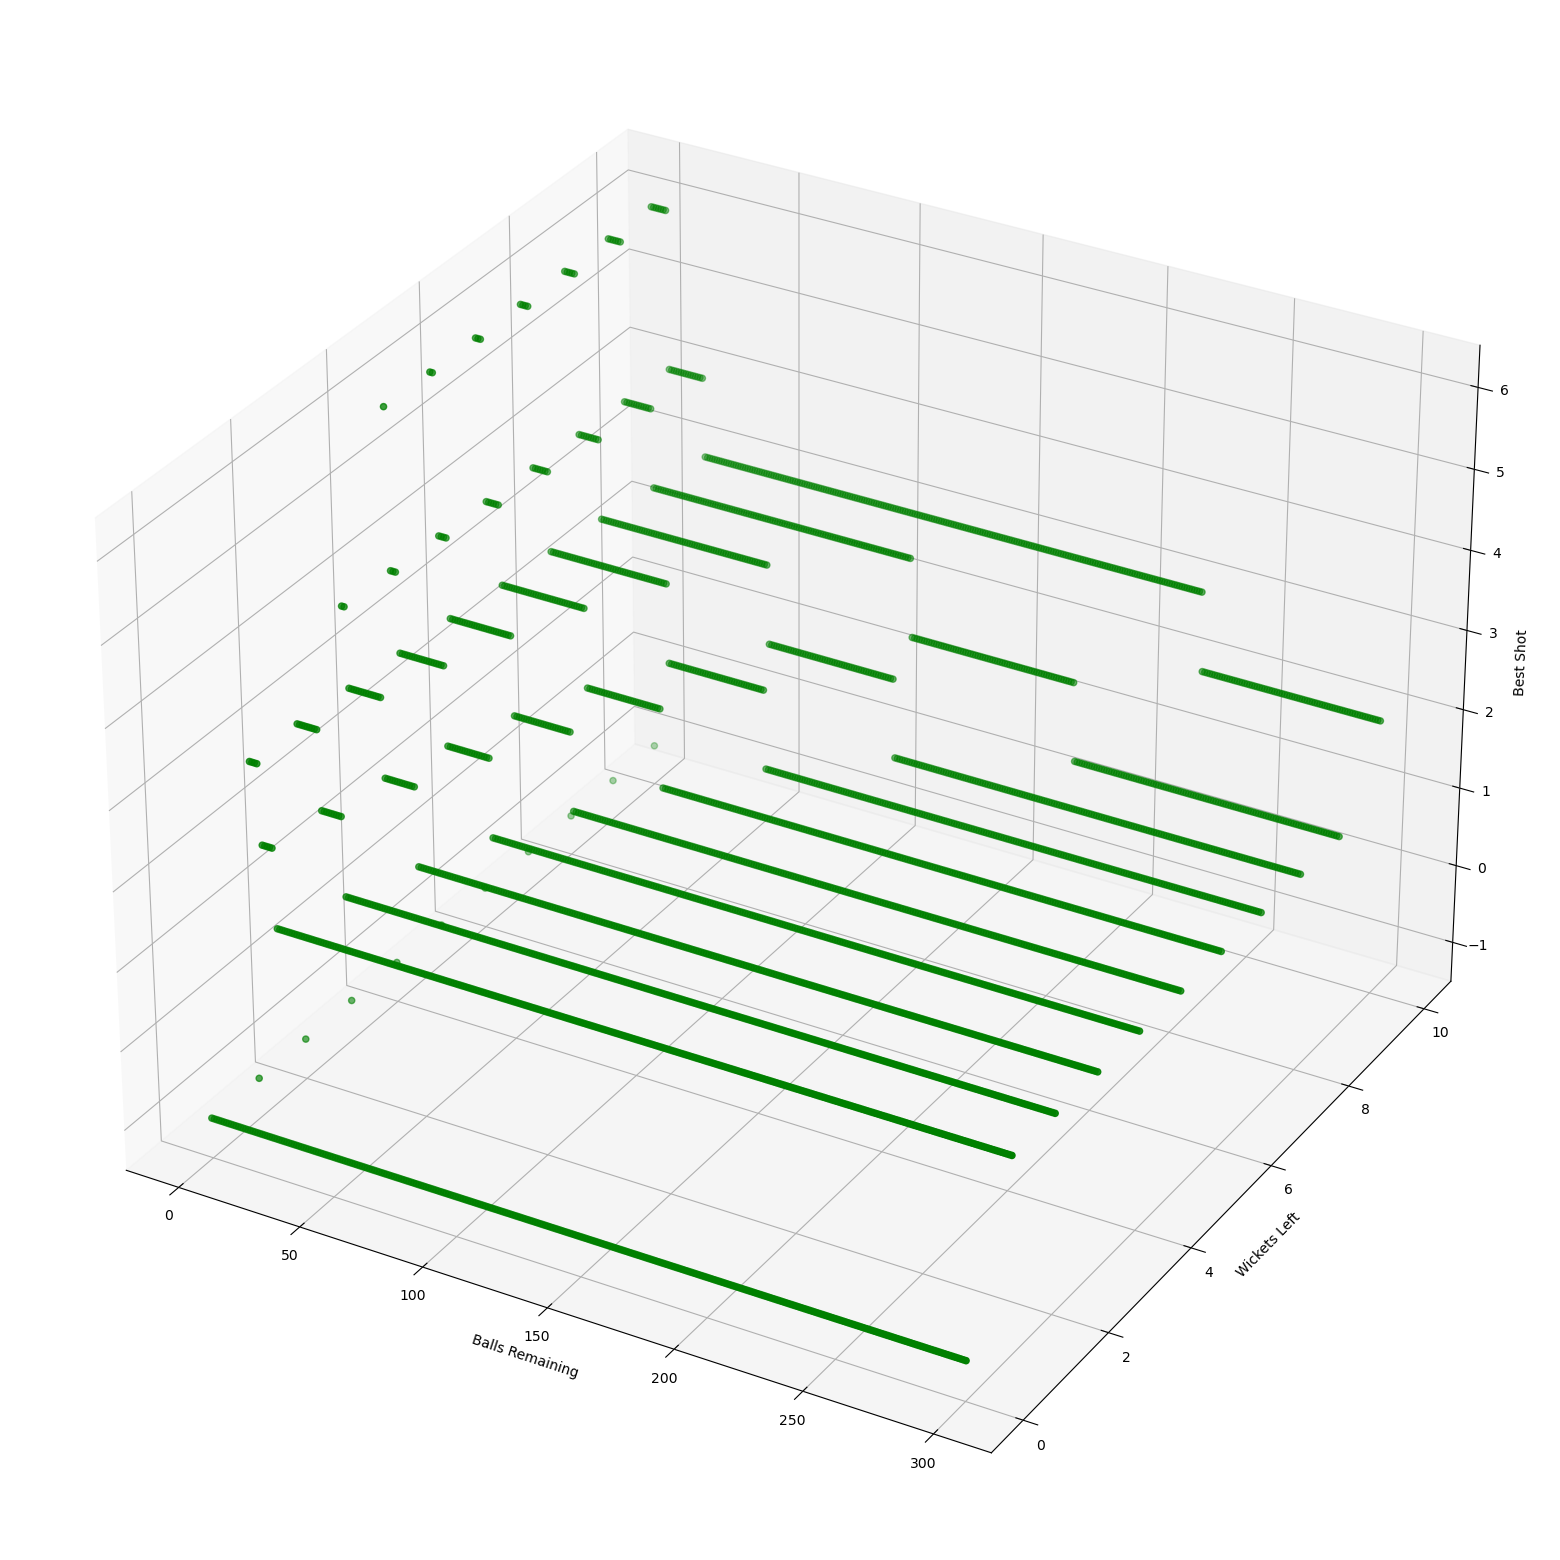

In [71]:

# playerObjects = [
#   Player(10-i) for i in range(10)
# ]
# player_10, player_9, player_8, player_7, ....

# print(playerObjects)


# the dynamic programming equation is 
# bestScore(b,w) = MAX{
#   a + prob_not_out_when_scoring_a * bestScore(b-1,w) + prob_out_when_scoring_a * bestScore(b-1,w-1)
#   
# }

for w in range(11):
  bestScore[0][w] = 0

for b in range(301):
  bestScore[b][0] = 0


for b in range(1,301):
  for w in range(1,11):
    # if there are w wickets left, the player playing is 11-w
    # for example, if there is 1 wicket left, the player is (10,11)
    player = Player(11-w)
    shots = player.shots
    prob_run = player.pRun
    # pRun = 1
    pOutList = player.pOutList
    max_action = 0
    max_shot = 0
    for i in range(len(shots)):
      action = shots[i]

      # pRun = 1
      pRun = prob_run
      pOut = pOutList[i]
      z = z = (1-pOut) * ((pRun * action) + bestScore[b-1][w]) + (pOut * bestScore[b-1][w-1])
      if z > max_action:
        max_action = z
        max_shot = action
    del player
    bestScore[b][w] = max_action
    bestShot[b][w] = max_shot

# for row in bestScore:
#   print(row)

# print(bestScore[300][10])
b_list_2 = []
w_list_2 = []
score_2 = []
shots_2 = []
for b in range(301):
  for w in range(11):
    b_list_2.append(b)
    w_list_2.append(w)
    score_2.append(bestScore[b][w])
    shots_2.append(bestShot[b][w])

plt.figure(figsize=(20,20))
ax2 = plt.axes(projection = '3d')
ax2.scatter(b_list_2, w_list_2, score_2)
ax2.set_xlabel('Balls Remaining')
ax2.set_ylabel('Wickets Left')
ax2.set_zlabel('BestScore')
# ax.set_xticklabels('Hello')


# plt.scatter(b_list, w_list)
plt.show()

plt.figure(figsize=(20,20))
ax1 = plt.axes(projection = '3d')
ax1.scatter(b_list, w_list, shots_2, color = 'green')
ax1.set_xlabel('Balls Remaining')
ax1.set_ylabel('Wickets Left')
ax1.set_zlabel('Best Shot')
# ax.set_xticklabels('Hello')


# plt.scatter(b_list, w_list)
plt.show()





Here also, it is a good idea to bat slowly during the early part of the game

In [72]:
for i in range(300,0,-1):
  for j in range(10,0,-1):
    print(f'Best Shot with {i} balls remaining and {j} wickets remaining is {bestShot[i][j]}')

Best Shot with 300 balls remaining and 10 wickets remaining is 2
Best Shot with 300 balls remaining and 9 wickets remaining is 1
Best Shot with 300 balls remaining and 8 wickets remaining is 1
Best Shot with 300 balls remaining and 7 wickets remaining is 1
Best Shot with 300 balls remaining and 6 wickets remaining is 1
Best Shot with 300 balls remaining and 5 wickets remaining is 1
Best Shot with 300 balls remaining and 4 wickets remaining is 1
Best Shot with 300 balls remaining and 3 wickets remaining is 1
Best Shot with 300 balls remaining and 2 wickets remaining is 1
Best Shot with 300 balls remaining and 1 wickets remaining is 1
Best Shot with 299 balls remaining and 10 wickets remaining is 2
Best Shot with 299 balls remaining and 9 wickets remaining is 1
Best Shot with 299 balls remaining and 8 wickets remaining is 1
Best Shot with 299 balls remaining and 7 wickets remaining is 1
Best Shot with 299 balls remaining and 6 wickets remaining is 1
Best Shot with 299 balls remaining and

In [73]:
optimal_runs = 0


for _ in range(10):
  odi = ODI()
  numBalls = 0
  while numBalls < 300 and odi.isActive:
    currentPlayer_index = odi.currentPlayerIndex
    wickets_remaining = 11 - currentPlayer_index
    playBall(odi, bestShot[300 - numBalls][wickets_remaining], run_prob= True)
    # if bestShot[300-numBalls][wickets_remaining] == -1:
    #   print('-1 reached')
    numBalls += 1
  optimal_runs += odi.totalRuns
  print(f'Runs scored is {odi.totalRuns}')
  del odi

print(f'The average Runs scored using optimal shot strategy is {optimal_runs/10}')

Runs scored is 275
Runs scored is 105
Runs scored is 250
Runs scored is 172
Runs scored is 205
Runs scored is 277
Runs scored is 210
Runs scored is 96
Runs scored is 156
Runs scored is 133
The average Runs scored using optimal shot strategy is 187.9
